# Análisis univariado y multivariado

Se usarán las siguientes variables para el análisis:
* **FECHA_INICIO_ACTIVIDADES:** Muestra el inicio de actividades del contribuyente, para el análisis se pueden establecer periodos (presidenciales, municipales, etc) y obtener una relación entre aquel y la cantidad de nuevos negocios.
* **FECHA_SUSPENSION_DEFINITIVA:** Fechas en las que un negocio dejó de operar. El análisis de esta variable nos ayudará a determinar en qué periodo temporal desaparecieron negocios, con lo que podremos analizar las medidas económicas tomadas por las instituciones alrededor de aquel periodo
* **ACTIVIDAD_ECONOMICA:** Define el tipo de actividad que el contribuyente ejerce. Con esta variable podemos generar grupos y poder profundizar el análisis
* **NUMERO_ESTABLECIMIENTO:** Número secuencial. Permite  conocer  el  orden  cronológico  de  la  creación  de los establecimientos.

In [14]:
import csv  # library csv
import pandas as pd  # library pandas
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
FILE_NAME = 'Proyecto/GUAYAQUIL.csv'
COLOR = "tan"

In [3]:
guayaquil = pd.read_csv(FILE_NAME, sep=',', encoding='utf-8', error_bad_lines=False, index_col=0)  # reading GUAYAQUIL file

In [4]:
guayaquil.columns

Index(['NUMERO_RUC', 'RAZON_SOCIAL', 'NOMBRE_COMERCIAL',
       'ESTADO_CONTRIBUYENTE', 'CLASE_CONTRIBUYENTE',
       'FECHA_INICIO_ACTIVIDADES', 'FECHA_ACTUALIZACION',
       'FECHA_SUSPENSION_DEFINITIVA', 'FECHA_REINICIO_ACTIVIDADES', 'OBLIGADO',
       'TIPO_CONTRIBUYENTE', 'NUMERO_ESTABLECIMIENTO',
       'NOMBRE_FANTASIA_COMERCIAL', 'CALLE', 'NUMERO', 'INTERSECCION',
       'ESTADO_ESTABLECIMIENTO', 'DESCRIPCION_PROVINCIA', 'DESCRIPCION_CANTON',
       'DESCRIPCION_PARROQUIA', 'CODIGO_CIIU', 'ACTIVIDAD_ECONOMICA'],
      dtype='object')

In [5]:
df = guayaquil.dropna(subset=['FECHA_INICIO_ACTIVIDADES'])

In [6]:
df.head()

,NUMERO_RUC,RAZON_SOCIAL,NOMBRE_COMERCIAL,ESTADO_CONTRIBUYENTE,CLASE_CONTRIBUYENTE,FECHA_INICIO_ACTIVIDADES,FECHA_ACTUALIZACION,FECHA_SUSPENSION_DEFINITIVA,FECHA_REINICIO_ACTIVIDADES,OBLIGADO,...,NOMBRE_FANTASIA_COMERCIAL,CALLE,NUMERO,INTERSECCION,ESTADO_ESTABLECIMIENTO,DESCRIPCION_PROVINCIA,DESCRIPCION_CANTON,DESCRIPCION_PARROQUIA,CODIGO_CIIU,ACTIVIDAD_ECONOMICA
ID,,,,,,,,,,,,,,,,,,,,,
1,100092519001,BAYANCELA GONZALEZ HUGO ENRIQUE,NaN,PASIVO,OTROS,20/11/1973,29/05/2008,29/09/2009,NaN,N,...,NaN,BOLIVIA,1300,NaN,CER,GUAYAS,GUAYAQUIL,GARCIA MORENO,Q862001,CONSULTA Y TRATAMIENTO POR MÉDICOS GENERALES Y...
2,100121268001,LUCERO VELEZ MANUEL SALVADOR,NaN,SUSPENDIDO,OTROS,30/04/1998,09/07/2009,31/08/2011,NaN,N,...,NaN,29 AVA.,4805,CALLE O - CALLE P,CER,GUAYAS,GUAYAQUIL,FEBRES CORDERO,H492101,TRANSPORTE TERRESTRE DE PASAJEROS POR SISTEMAS...
3,100122753001,AGUILERA TORAL MIGUEL PATRICIO,NaN,ACTIVO,OTROS,28/06/1985,17/07/2017,NaN,NaN,S,...,ELECTRONICA LOS ANDES,AV EL BOMBERO,S/N,S/N,CER,GUAYAS,GUAYAQUIL,TARQUI,G469000,VENTA AL POR MAYOR DE DIVERSOS PRODUCTOS SIN E...
4,100122753001,AGUILERA TORAL MIGUEL PATRICIO,NaN,ACTIVO,OTROS,28/06/1985,17/07/2017,NaN,NaN,S,...,ELECTRONICA LOS ANDES,AV BENJAMIN CARRION,S/N,TERCERA,CER,GUAYAS,GUAYAQUIL,TARQUI,G469000,VENTA AL POR MAYOR DE DIVERSOS PRODUCTOS SIN E...
5,100122753001,AGUILERA TORAL MIGUEL PATRICIO,NaN,ACTIVO,OTROS,28/06/1985,17/07/2017,NaN,NaN,S,...,ELECTRONICA LOS ANDES,AV CARLOS JULIO AROSEMENA,S/N,S/N,CER,GUAYAS,GUAYAQUIL,TARQUI,G469000,VENTA AL POR MAYOR DE DIVERSOS PRODUCTOS SIN E...


In [7]:
df['FECHA_INICIO_ACTIVIDADES'] = pd.to_datetime(df['FECHA_INICIO_ACTIVIDADES'])
df['fecha_ano'] = df['FECHA_INICIO_ACTIVIDADES'].dt.year

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
# solo consideramos para nuestro analisis desde 1998
df_anos = df[ (1998 <=df['fecha_ano']) & (df['fecha_ano']<=2018) ]

## total de contribuyentes por año desde 1998 hasta 2018

In [11]:
# total de contribuyente para este analisis
total = float(len(df_anos))
total

792193.0

In [12]:
tabla_x_ano = df_anos.groupby("fecha_ano").count()
tabla_x_ano["NUMERO_RUC"]

fecha_ano
1998    19342
1999    35575
2000    35353
2001    31316
2002    45515
2003    30886
2004    32167
2005    36310
2006    35801
2007    35994
2008    46410
2009    44846
2010    44890
2011    40511
2012    43271
2013    42311
2014    40199
2015    33542
2016    32705
2017    35964
2018    49285
Name: NUMERO_RUC, dtype: int64

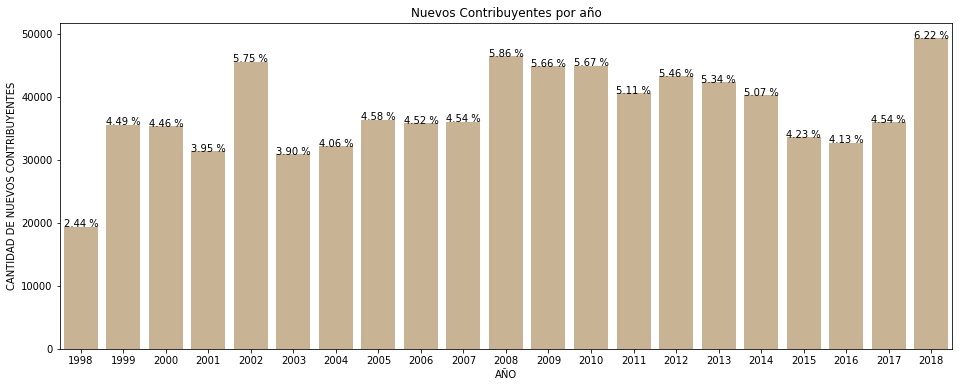

In [15]:
#nuevos contribuyentes
plt.figure(figsize=(16, 6))
ax = sns.countplot(x='fecha_ano', data=df_anos,color=COLOR)
ax.set(ylabel='CANTIDAD DE NUEVOS CONTRIBUYENTES', xlabel="AÑO",title='Nuevos Contribuyentes por año')
total = float(len(df_anos))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} %'.format((height/total) * 100),
            ha="center")

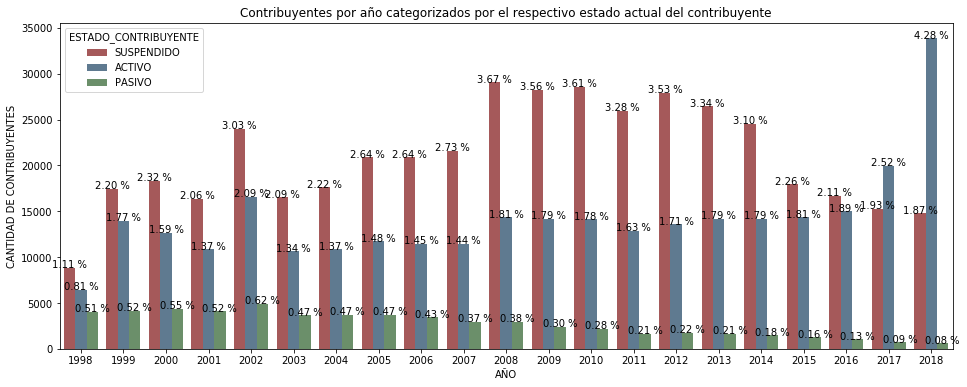

In [16]:
#contribuyentes por año deacuerdo a su estado
plt.figure(figsize=(16, 6))
ax = sns.countplot(x='fecha_ano', data=df_anos, hue="ESTADO_CONTRIBUYENTE",palette=sns.color_palette("Set1", n_colors=3, desat=.5))
ax.set(ylabel='CANTIDAD DE CONTRIBUYENTES', xlabel="AÑO",title='Contribuyentes por año categorizados por el respectivo estado actual del contribuyente')
total = float(len(df_anos))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} %'.format((height/total) * 100),
            ha="center")

<Figure size 1152x432 with 0 Axes>

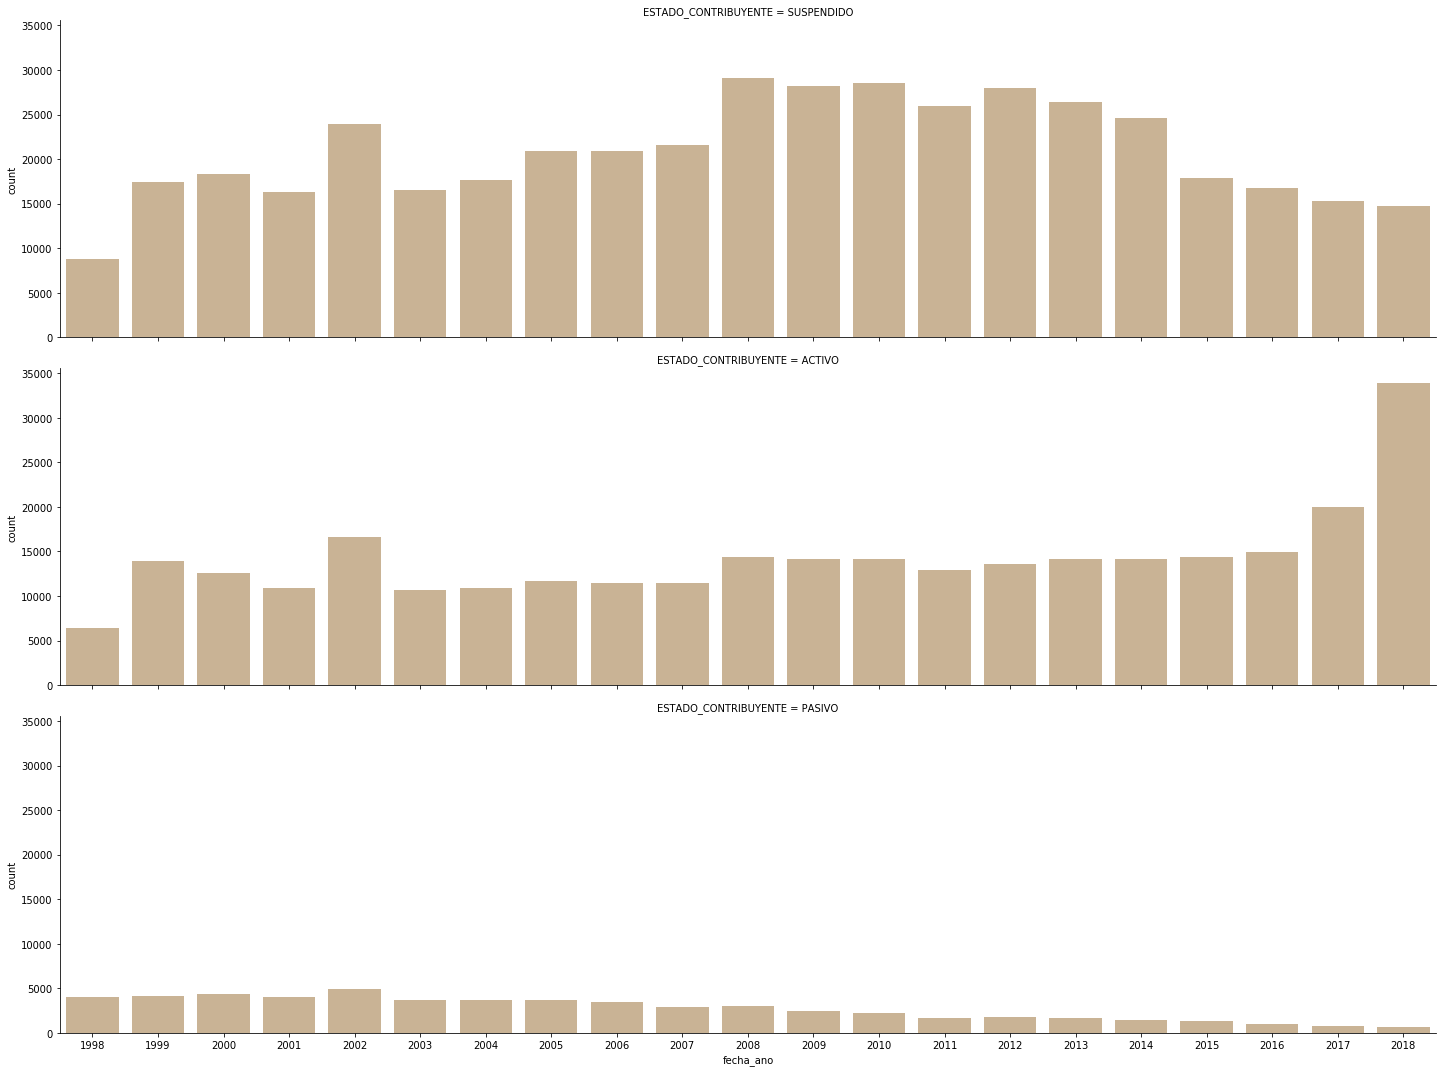

In [17]:
plt.figure(figsize=(16, 6))
ax = sns.catplot(x="fecha_ano", data=df_anos, color=COLOR,row="ESTADO_CONTRIBUYENTE",kind="count",height=5, aspect=4)
total = float(len(df_anos))

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


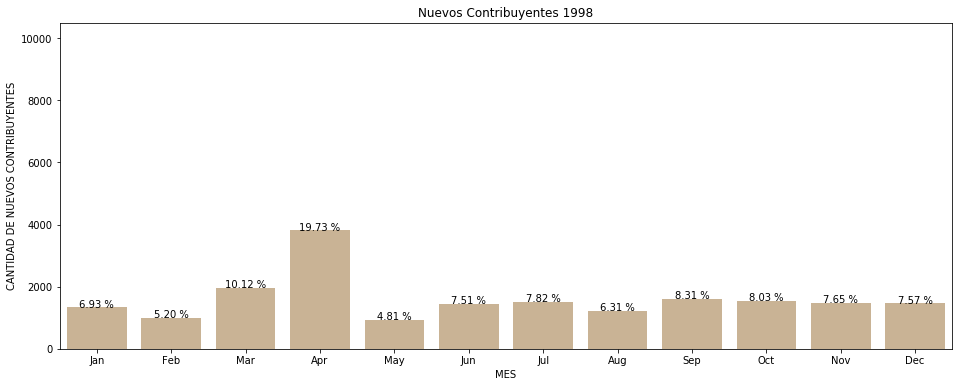

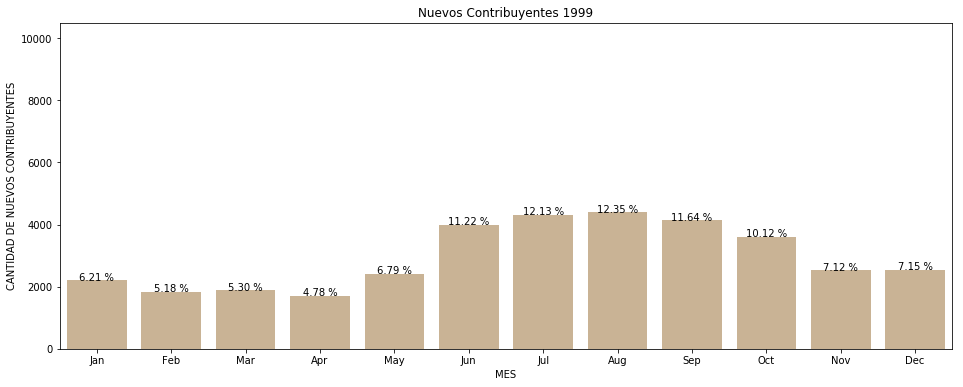

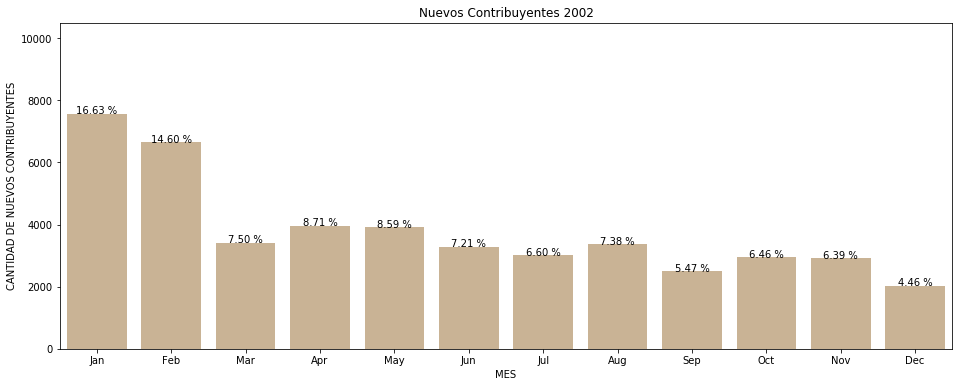

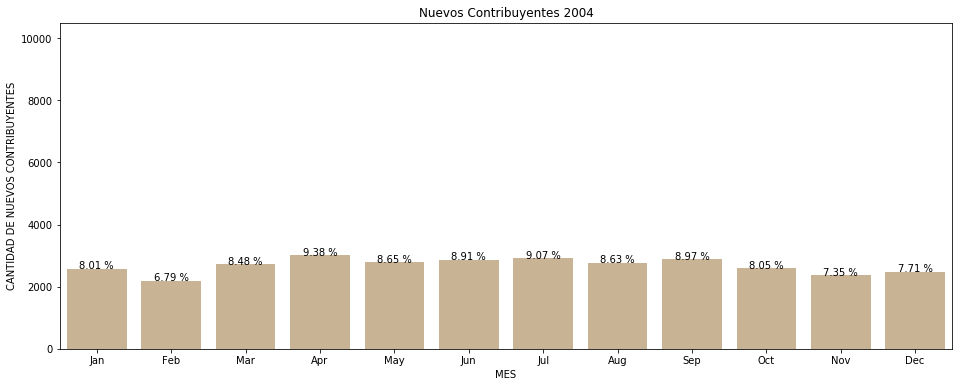

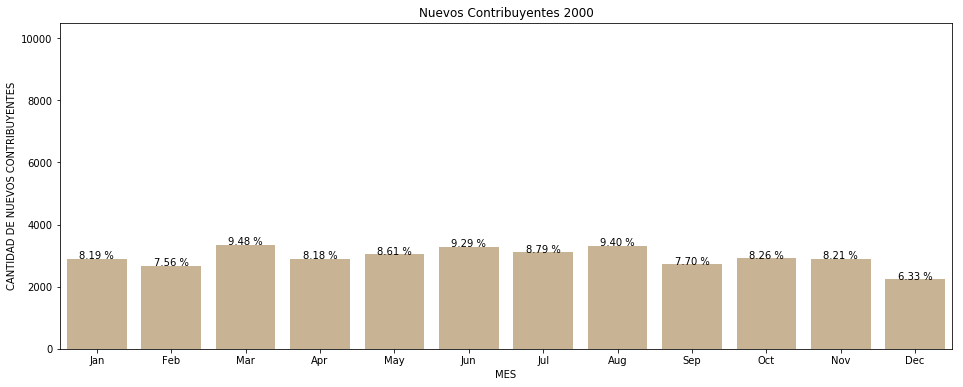

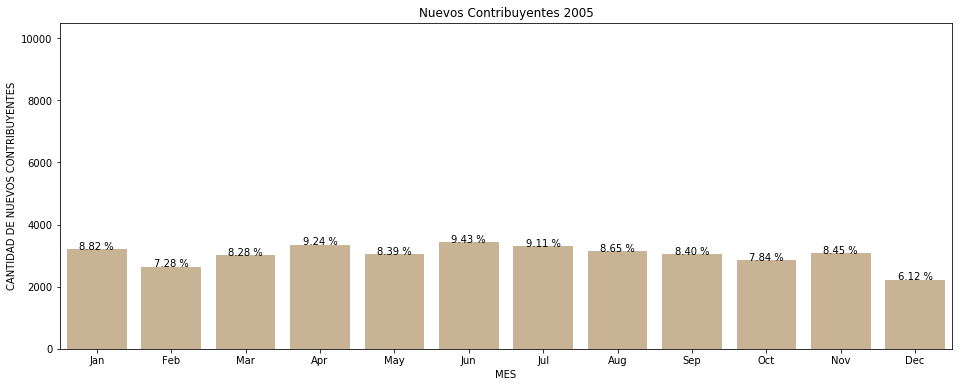

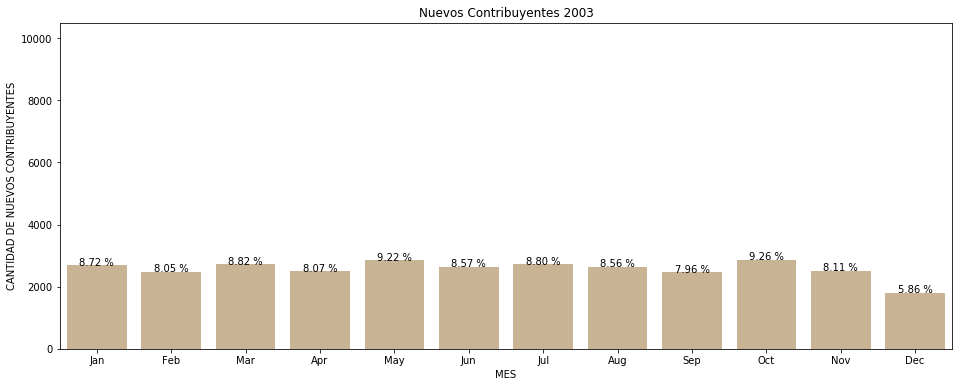

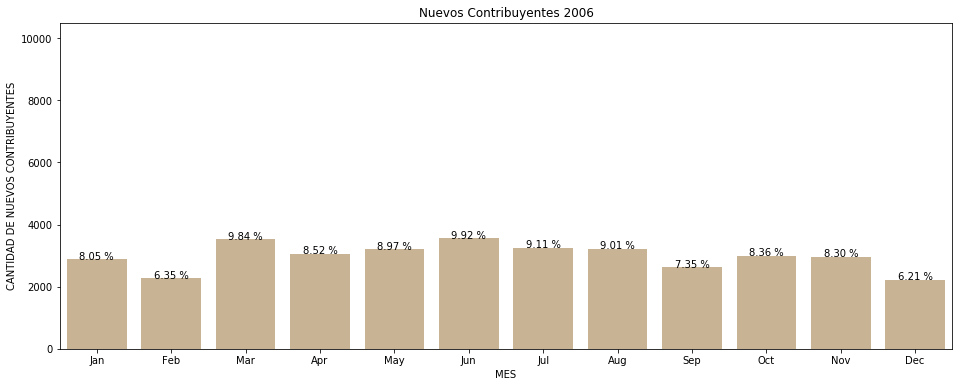

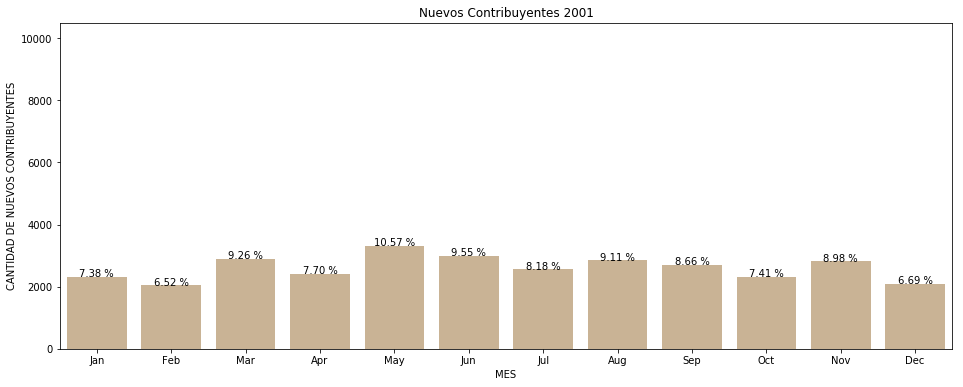

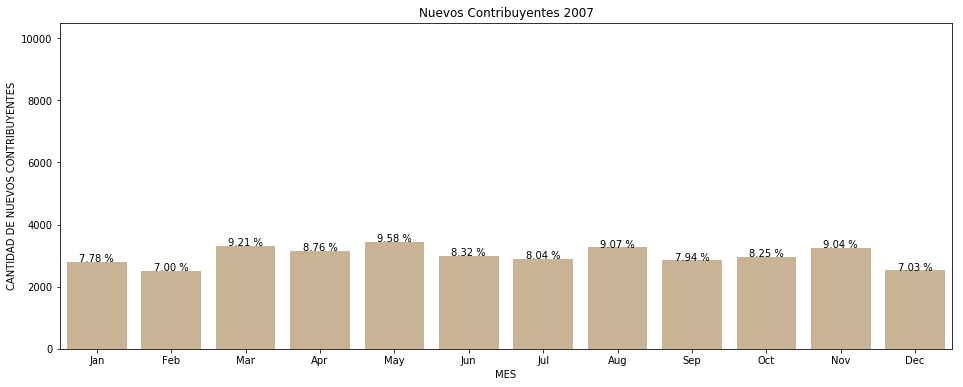

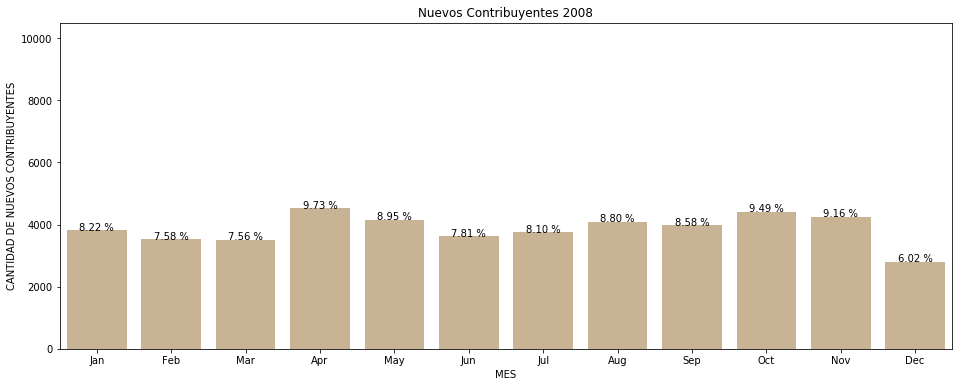

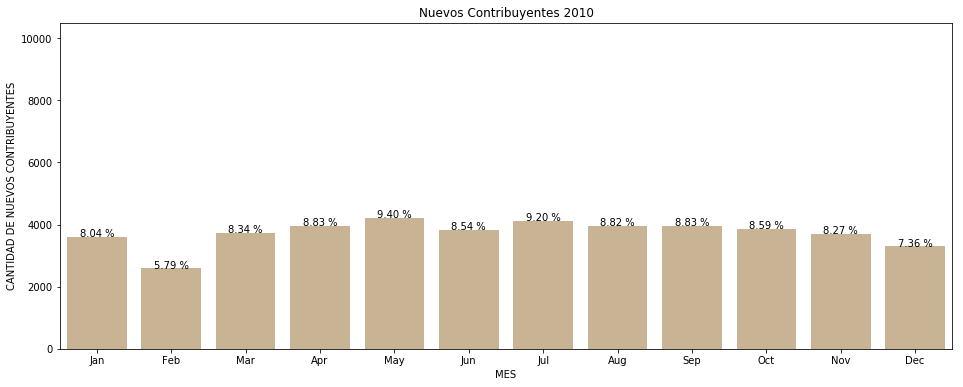

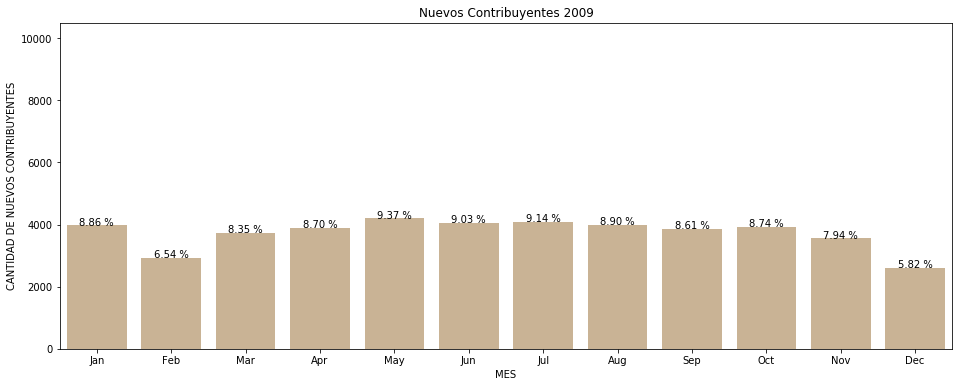

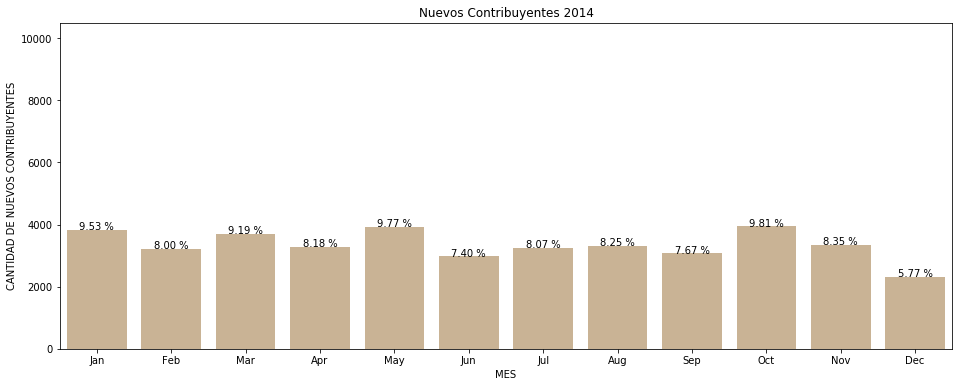

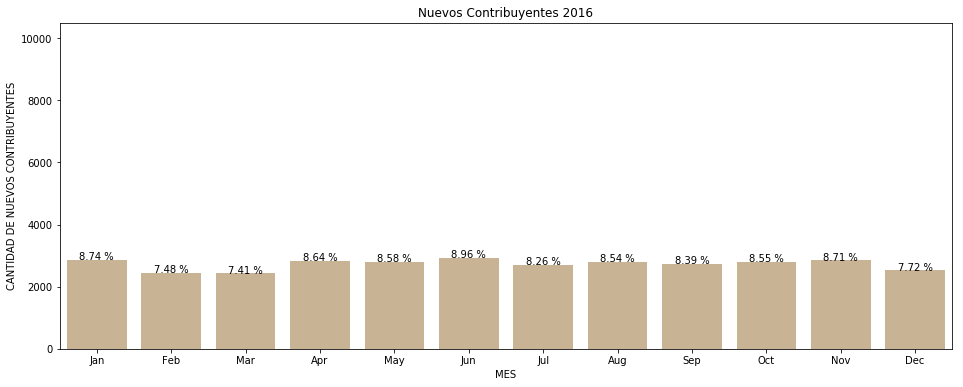

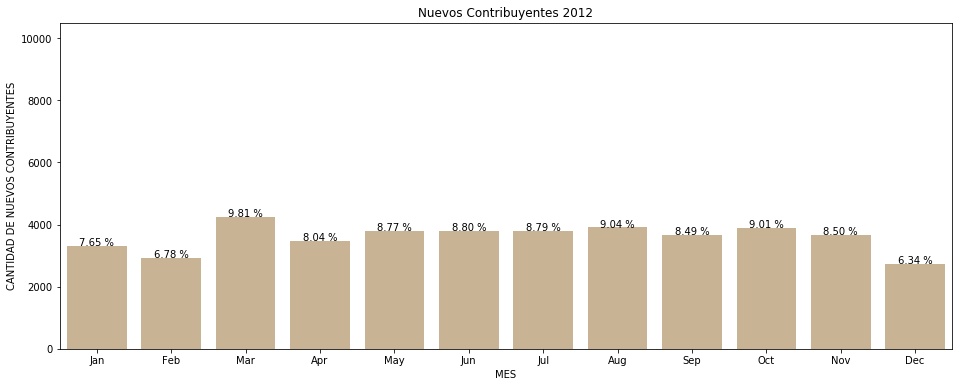

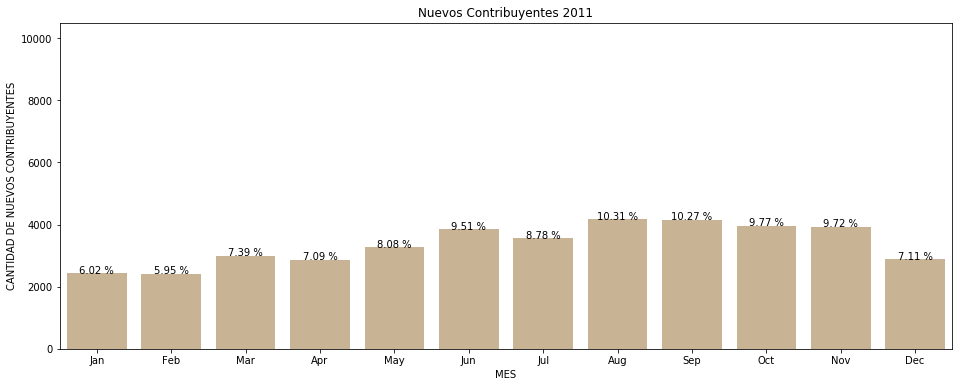

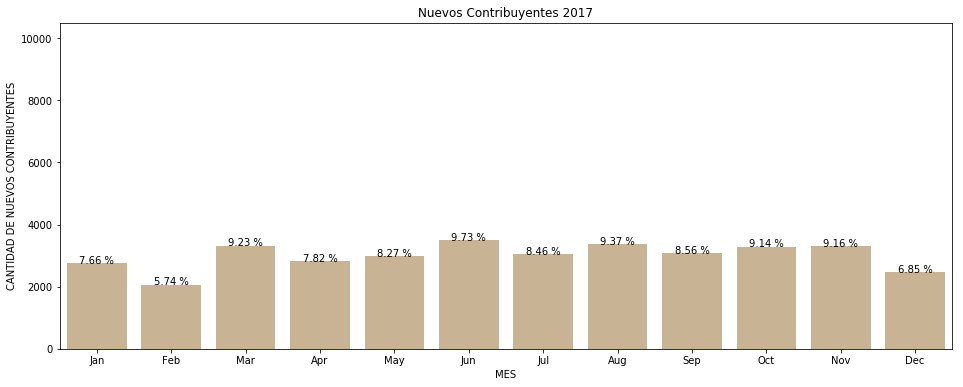

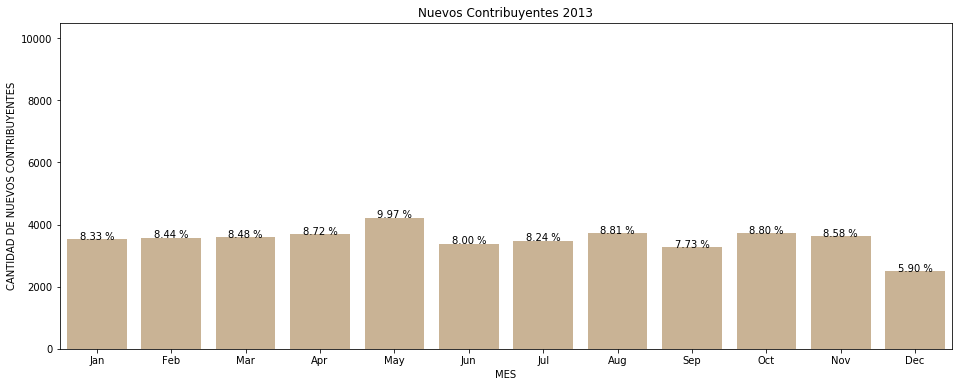

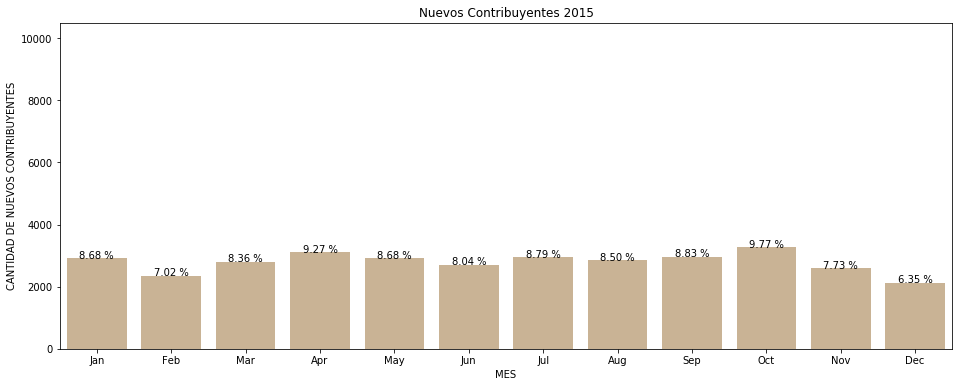

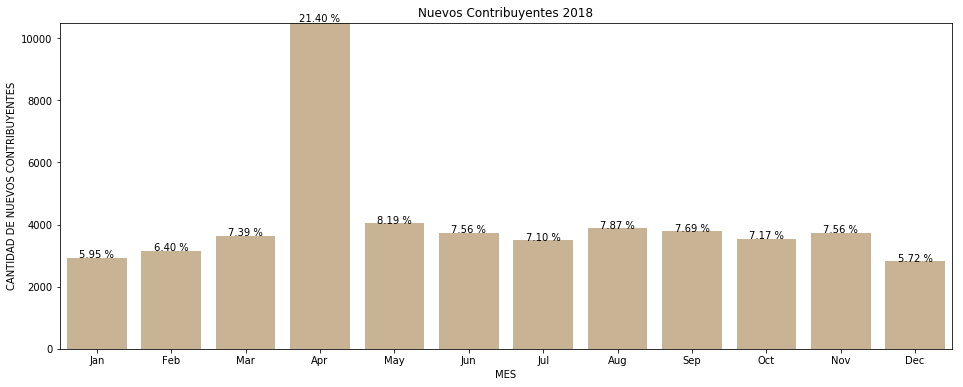

In [18]:
def por_mes(ano):
    plt.figure(figsize=(16, 6))
    df_x = df_anos[df_anos['fecha_ano']==ano ]
    ax = sns.countplot(x='fecha_mes', data=df_x,color=COLOR,order=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
    ax.set(ylabel='CANTIDAD DE NUEVOS CONTRIBUYENTES', xlabel="MES",title='Nuevos Contribuyentes ' + str(ano),ylim=(0, 10500))
    total = float(len(df_x))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
        height + 3,
        '{:1.2f} %'.format((height/total) * 100),
        ha="center")
    plt.savefig("CONTRIBUYENTES_X_MES_"+str(ano)+".png")
def mapper(month):
    return month.strftime('%b') 
df_anos['fecha_mes'] = df_anos['FECHA_INICIO_ACTIVIDADES'].apply(mapper)
for ano in df_anos['fecha_ano'].unique().tolist():
    por_mes(ano)
#convert -delay 30 *.png animated_chart.gif

In [19]:
poblacion_x = pd.read_csv("Proyecto/factorNormalizacionGUAYAQUIL.csv" ,sep=",",encoding ="utf-8",error_bad_lines=False)
poblacion_x

,DESCRIPCION_PARROQUIA,POBLACION,AREA,FACTOR,TOTAL_LOCALES
0,GUAYAQUIL,2291158.0,2493.86,0.008343,19114
1,JUAN GÓMEZ RENDÓN(PROGRESO),11897.0,326.45,0.154661,1840
2,MORRO,5019.0,270.12,0.155011,778
3,POSORJA,24136.0,73.18,0.207698,5013
4,PUNA,6769.0,894.64,0.268134,1815
5,TENGUEL,11936.0,138.12,0.210288,2510
6,AYACUCHO,10706.0,NaN,1.293293,13846
7,FEBRES CORDERO,343836.0,NaN,0.317518,109174
8,GARCIA MORENO,50028.0,NaN,0.511314,25580
9,LETAMENDI,95943.0,NaN,0.328862,31552


In [21]:
def por_ano_parroquia(ano):
    df_x = df_anos[df_anos['fecha_ano']==ano]
    df_x_parroquia = df_x.groupby(["DESCRIPCION_PARROQUIA"]).count().reset_index()
    df_x_parroquia = df_x_parroquia[["DESCRIPCION_PARROQUIA","NUMERO_RUC"]]
    resultado = pd.merge(left=df_x_parroquia,right=poblacion_x, left_on='DESCRIPCION_PARROQUIA', right_on='DESCRIPCION_PARROQUIA',suffixes=("",""))
    resultado["cantidadNormalizada"] = resultado["NUMERO_RUC"] * resultado["FACTOR"]
    print(resultado["cantidadNormalizada"].max())
    resultado = resultado[["DESCRIPCION_PARROQUIA","cantidadNormalizada"]]
    resultado.to_csv("parroquias_"+str(ano)+".csv", header=True, encoding="utf-8", index=False)
for ano in df_anos['fecha_ano'].unique().tolist():
    por_ano_parroquia(ano)
#convert -delay 30 *.png animated_chart.gif

15954.808923375365
30775.216294859365
28634.490785645008
22925.88942774006
28817.458777885553
22358.68865179438
22742.921435499517
22084.236663433563
23804.135790494667
17345.365664403493
17089.210475266733
14655.736178467509
15607.169738118333
9843.677982541223
7428.500484966054
13228.585838991272
12020.997090203688
7446.797284190107
11892.919495635308
8361.637245392823
10520.659553831232


In [22]:
df_parroquias = df_anos
df_parroquias["cantidad"] = df_parroquias.groupby(["fecha_ano","DESCRIPCION_PARROQUIA"])["NUMERO_RUC"].transform(lambda x : x.count())
df_x_parroquia = df_parroquias[["DESCRIPCION_PARROQUIA","fecha_ano","FECHA_INICIO_ACTIVIDADES","cantidad"]]
df_x_parroquia.drop_duplicates(subset=["DESCRIPCION_PARROQUIA","fecha_ano","FECHA_INICIO_ACTIVIDADES"]).to_csv("por_parroquiasGuayaquil.csv", header=True, encoding="utf-8", index=False)
df_parroquias

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,NUMERO_RUC,RAZON_SOCIAL,NOMBRE_COMERCIAL,ESTADO_CONTRIBUYENTE,CLASE_CONTRIBUYENTE,FECHA_INICIO_ACTIVIDADES,FECHA_ACTUALIZACION,FECHA_SUSPENSION_DEFINITIVA,FECHA_REINICIO_ACTIVIDADES,OBLIGADO,...,INTERSECCION,ESTADO_ESTABLECIMIENTO,DESCRIPCION_PROVINCIA,DESCRIPCION_CANTON,DESCRIPCION_PARROQUIA,CODIGO_CIIU,ACTIVIDAD_ECONOMICA,fecha_ano,fecha_mes,cantidad
ID,,,,,,,,,,,,,,,,,,,,,
2,100121268001,LUCERO VELEZ MANUEL SALVADOR,NaN,SUSPENDIDO,OTROS,1998-04-30,09/07/2009,31/08/2011,NaN,N,...,CALLE O - CALLE P,CER,GUAYAS,GUAYAQUIL,FEBRES CORDERO,H492101,TRANSPORTE TERRESTRE DE PASAJEROS POR SISTEMAS...,1998,Apr,2279
11,100194281001,ARIZAGA MOREIRA EDGAR REMIGIO,NaN,SUSPENDIDO,OTROS,1999-01-06,13/06/2001,13/09/2006,NaN,N,...,NaN,CER,GUAYAS,GUAYAQUIL,TARQUI,G471101,VENTA AL POR MENOR DE GRAN VARIEDAD DE PRODUCT...,1999,Jan,15590
18,100241785001,PUCHOL MARIA CRUZ,NaN,SUSPENDIDO,OTROS,1999-07-12,04/03/2015,01/09/2018,04/03/2015,N,...,AYACUCHO - MANABI,CER,GUAYAS,GUAYAQUIL,OLMEDO (SAN ALEJO),G464124,VENTA AL POR MAYOR DE ARTÍCULOS DE BAZAR EN GE...,1999,Jul,1201
19,100241785001,PUCHOL MARIA CRUZ,NaN,SUSPENDIDO,OTROS,1999-07-12,04/03/2015,01/09/2018,04/03/2015,N,...,AYACUCHO - MANABI,CER,GUAYAS,GUAYAQUIL,OLMEDO (SAN ALEJO),G464124,VENTA AL POR MAYOR DE ARTÍCULOS DE BAZAR EN GE...,1999,Jul,1201
20,100324045001,PIÑA CABRERA LUIS HERIBERTO,NaN,ACTIVO,OTROS,1999-09-23,06/07/2016,NaN,06/07/2016,N,...,NaN,ABI,GUAYAS,GUAYAQUIL,TARQUI,G479902,VENTA AL POR MENOR POR COMISIONISTAS (NO DEPEN...,1999,Sep,15590
21,100318161001,SOLANO MACHUCA JORGE RUBEN,NaN,ACTIVO,OTROS,1999-06-04,24/02/2012,NaN,24/02/2012,N,...,AV. PRINCIPAL,ABI,GUAYAS,GUAYAQUIL,TARQUI,M711011,ACTIVIDADES DE ASESORAMIENTO TÉCNICO DE ARQUIT...,1999,Jun,15590
28,100049725001,ALVAREZ ESPINOZA NESTORIO DE JESUS,NaN,ACTIVO,OTROS,1999-09-09,15/09/2016,NaN,21/11/2012,N,...,AV. CARLOS LUIS PLAZA DAÑIN,ABI,GUAYAS,GUAYAQUIL,TARQUI,P854915,ACTIVIDADES DE FORMACIÓN RELIGIOSA.,1999,Sep,15590
30,100011972001,MALO GONZALEZ JUAN RODRIGO,NaN,SUSPENDIDO,OTROS,2002-02-19,06/06/2002,19/02/2002,NaN,N,...,CALLE 4TA.,CER,GUAYAS,GUAYAQUIL,TARQUI,W200000,ACTIVIDADES LABORALES REALIZADAS BAJO RELACION...,2002,Feb,21362
34,100069160001,PILCO NARVAEZ FAUSTO BOLIVAR,NaN,SUSPENDIDO,OTROS,2002-01-31,03/06/2015,06/03/2017,17/10/2014,N,...,6 DE MARZO,CER,GUAYAS,GUAYAQUIL,XIMENA,M691009,OTRAS ACTIVIDADES DE ASESORAMIENTO Y REPRESENT...,2002,Jan,8645


### Discretizando los datos - Nuevos contribuyentes
Creamos una columna `PRESIDENTE` que determina el presidente durante el periodo de tiempo en que han registrado nuevos contribuyentes

In [23]:
mahuad_per_ini = df[(df['FECHA_INICIO_ACTIVIDADES'] > datetime.date(1998,8,10)) & (df['FECHA_INICIO_ACTIVIDADES'] < datetime.date(2000,1,22))].assign(PRESIDENTE='Jamil Mahuad')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [24]:
gn_per_ini = df[(df['FECHA_INICIO_ACTIVIDADES'] > datetime.date(2000,1,22)) & (df['FECHA_INICIO_ACTIVIDADES'] < datetime.date(2003,1,5))].assign(PRESIDENTE='Gustavo Noboa')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [25]:
guti_per_ini = df[(df['FECHA_INICIO_ACTIVIDADES'] > datetime.date(2003,1,5)) & (df['FECHA_INICIO_ACTIVIDADES'] < datetime.date(2005,4,20))].assign(PRESIDENTE='Lucio Gutiérrez')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [26]:
pala_per_ini = df[(df['FECHA_INICIO_ACTIVIDADES'] > datetime.date(2005,4,20)) & (df['FECHA_INICIO_ACTIVIDADES'] < datetime.date(2007,1,15))].assign(PRESIDENTE='Alfredo Palacio')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [27]:
rc1_per_ini = df[(df['FECHA_INICIO_ACTIVIDADES'] > datetime.date(2007,1,15)) & (df['FECHA_INICIO_ACTIVIDADES'] < datetime.date(2009,8,10))].assign(PRESIDENTE='Rafael Correa P1')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [28]:
rc2_per_ini = df[(df['FECHA_INICIO_ACTIVIDADES'] > datetime.date(2009,8,10)) & (df['FECHA_INICIO_ACTIVIDADES'] < datetime.date(2013,5,24))].assign(PRESIDENTE='Rafael Correa P2')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [29]:
rc3_per_ini = df[(df['FECHA_INICIO_ACTIVIDADES'] > datetime.date(2013,5,24)) & (df['FECHA_INICIO_ACTIVIDADES'] < datetime.date(2017,5,24))].assign(PRESIDENTE='Rafael Correa P3')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [30]:
lenin_per_ini = df[df['FECHA_INICIO_ACTIVIDADES'] > datetime.date(2017,5,24)].assign(PRESIDENTE='Lenín Moreno')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [31]:
lenin_per_ini.head()

,NUMERO_RUC,RAZON_SOCIAL,NOMBRE_COMERCIAL,ESTADO_CONTRIBUYENTE,CLASE_CONTRIBUYENTE,FECHA_INICIO_ACTIVIDADES,FECHA_ACTUALIZACION,FECHA_SUSPENSION_DEFINITIVA,FECHA_REINICIO_ACTIVIDADES,OBLIGADO,...,NUMERO,INTERSECCION,ESTADO_ESTABLECIMIENTO,DESCRIPCION_PROVINCIA,DESCRIPCION_CANTON,DESCRIPCION_PARROQUIA,CODIGO_CIIU,ACTIVIDAD_ECONOMICA,fecha_ano,PRESIDENTE
ID,,,,,,,,,,,,,,,,,,,,,
458318,919268458001,RODRIGUEZ ZAMBRANO RUDDY BEATRIZ,NaN,SUSPENDIDO,OTROS,2017-12-06,NaN,21/11/2017,NaN,N,...,SOLAR 01,NaN,CER,GUAYAS,GUAYAQUIL,TARQUI,S960907,"ACTIVIDADES DE LIMPIABOTAS (BETUNEROS), PORTEA...",2017,Lenín Moreno
458319,919375790001,BORJA CASTRO CARLOS ALBERTO,NaN,SUSPENDIDO,OTROS,2017-12-06,NaN,31/07/2018,NaN,N,...,S/N,NaN,CER,GUAYAS,GUAYAQUIL,TARQUI,C181104,"ACTIVIDADES DE IMPRESIÓN DE PÓSTERS, GIGANTOGR...",2017,Lenín Moreno
458563,919433268001,ADRIAN BAJAÑA JAVIER HUMBERTO,NaN,SUSPENDIDO,OTROS,2017-12-06,NaN,27/08/2018,NaN,N,...,SOLAR 15,NaN,CER,GUAYAS,GUAYAQUIL,TARQUI,S952201,REPARACIÓN Y MANTENIMIENTO DE APARATOS DE USO ...,2017,Lenín Moreno
458564,919442624001,OLGUIN CORTEZ RAUL JAVIER,MIS TIERNOS DELFINES,SUSPENDIDO,OTROS,2017-12-06,12/06/2017,26/08/2018,NaN,N,...,SOLAR 11,NaN,CER,GUAYAS,GUAYAQUIL,TARQUI,I561001,"RESTAURANTES, CEVICHERÍAS, PICANTERÍAS, CAFETE...",2017,Lenín Moreno
470381,101868404001,BERNAL ANDRADE SALVADOR ELIAS,NaN,ACTIVO,RISE,2018-01-23,10/09/2018,NaN,10/09/2018,N,...,2209,MARACAIBO ENTRE A GONZALEZ,ABI,GUAYAS,GUAYAQUIL,FEBRES CORDERO,G477111,VENTA AL POR MENOR DE PRENDAS DE VESTIR Y PELE...,2018,Lenín Moreno


In [32]:
cdf = pd.concat([mahuad_per_ini, gn_per_ini, guti_per_ini, pala_per_ini, rc1_per_ini, rc2_per_ini, rc3_per_ini, lenin_per_ini])

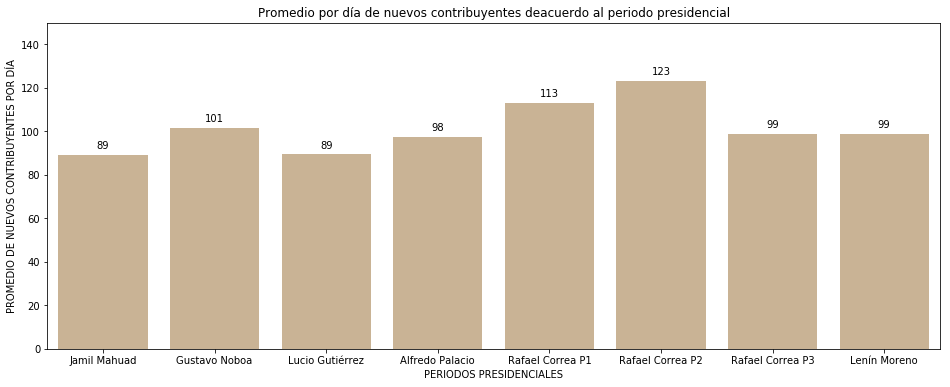

In [33]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x='PRESIDENTE', data=cdf,color=COLOR)
ax.set(ylabel='PROMEDIO DE NUEVOS CONTRIBUYENTES POR DÍA',xlabel="PERIODOS PRESIDENCIALES", title='Promedio por día de nuevos contribuyentes deacuerdo al periodo presidencial',ylim=(0, 150))
total = float(len(cdf))
dias_x_periodo = [780,1461,1322,969,635,826,1089,498]  # jm - lenin  --
uso_nuevos = dias_x_periodo.copy()
for p in ax.patches:
    dias = uso_nuevos.pop()
    p.set_height(p.get_height()/dias)
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center")

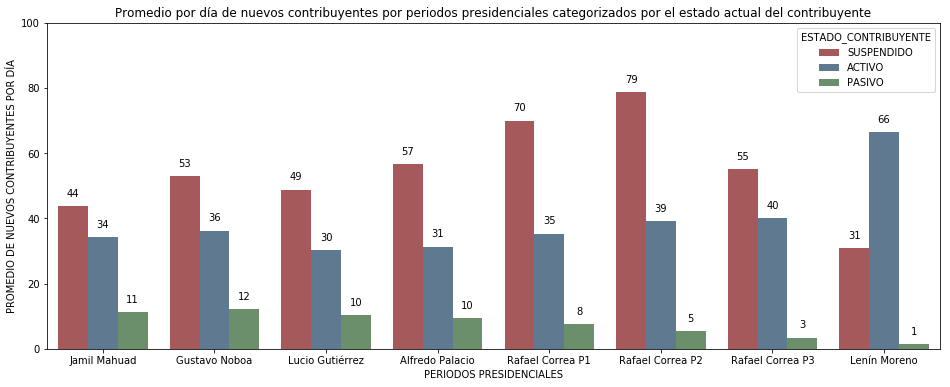

In [34]:
plt.figure(figsize=(16, 6))
dias_x_periodo = [780,1461,1322,969,635,826,1089,498,780,1461,1322,969,635,826,1089,498,780,1461,1322,969,635,826,1089,498]  # jm - lenin  --
uso_nuevos = dias_x_periodo.copy()
ax = sns.countplot(x='PRESIDENTE', data=cdf, hue="ESTADO_CONTRIBUYENTE",palette=sns.color_palette("Set1", n_colors=3, desat=.5))
ax.set(ylabel='PROMEDIO DE NUEVOS CONTRIBUYENTES POR DÍA',xlabel="PERIODOS PRESIDENCIALES", title='Promedio por día de nuevos contribuyentes por periodos presidenciales categorizados por el estado actual del contribuyente',ylim=(0, 100))
total = float(len(cdf))
for p in ax.patches:
    dias = uso_nuevos.pop()
    p.set_height(p.get_height()/dias)
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center")

In [35]:
df2 = guayaquil.dropna(subset=['FECHA_SUSPENSION_DEFINITIVA'])

In [36]:
df2

,NUMERO_RUC,RAZON_SOCIAL,NOMBRE_COMERCIAL,ESTADO_CONTRIBUYENTE,CLASE_CONTRIBUYENTE,FECHA_INICIO_ACTIVIDADES,FECHA_ACTUALIZACION,FECHA_SUSPENSION_DEFINITIVA,FECHA_REINICIO_ACTIVIDADES,OBLIGADO,...,NOMBRE_FANTASIA_COMERCIAL,CALLE,NUMERO,INTERSECCION,ESTADO_ESTABLECIMIENTO,DESCRIPCION_PROVINCIA,DESCRIPCION_CANTON,DESCRIPCION_PARROQUIA,CODIGO_CIIU,ACTIVIDAD_ECONOMICA
ID,,,,,,,,,,,,,,,,,,,,,
1,100092519001,BAYANCELA GONZALEZ HUGO ENRIQUE,NaN,PASIVO,OTROS,20/11/1973,29/05/2008,29/09/2009,NaN,N,...,NaN,BOLIVIA,1300,NaN,CER,GUAYAS,GUAYAQUIL,GARCIA MORENO,Q862001,CONSULTA Y TRATAMIENTO POR MÉDICOS GENERALES Y...
2,100121268001,LUCERO VELEZ MANUEL SALVADOR,NaN,SUSPENDIDO,OTROS,30/04/1998,09/07/2009,31/08/2011,NaN,N,...,NaN,29 AVA.,4805,CALLE O - CALLE P,CER,GUAYAS,GUAYAQUIL,FEBRES CORDERO,H492101,TRANSPORTE TERRESTRE DE PASAJEROS POR SISTEMAS...
9,100160480001,PEÑAFIEL DIAZ LUIS RODRIGO,NaN,SUSPENDIDO,OTROS,17/08/1995,04/02/2015,09/09/2018,04/02/2015,N,...,NaN,NaN,SOLAR 21,NaN,CER,GUAYAS,GUAYAQUIL,TARQUI,L682002,"INTERMEDIACIÓN EN LA COMPRA, VENTA Y ALQUILER ..."
11,100194281001,ARIZAGA MOREIRA EDGAR REMIGIO,NaN,SUSPENDIDO,OTROS,01/06/1999,13/06/2001,13/09/2006,NaN,N,...,NaN,NaN,SL. 6,NaN,CER,GUAYAS,GUAYAQUIL,TARQUI,G471101,VENTA AL POR MENOR DE GRAN VARIEDAD DE PRODUCT...
12,100169242001,OCHOA LEON EMMA LUCIA,NaN,SUSPENDIDO,OTROS,19/04/1997,07/12/2001,13/07/2010,NaN,N,...,NaN,VENEZUELA,3716,12 AVA,CER,GUAYAS,GUAYAQUIL,FEBRES CORDERO,G471101,VENTA AL POR MENOR DE GRAN VARIEDAD DE PRODUCT...
13,100171081001,CARRION LUIS ANTONIO,ALMACEN ROLANDO N 1,PASIVO,OTROS,07/08/1972,13/08/1999,30/12/1978,01/01/1981,N,...,ALMACEN ROLANDO 2,LORENZO DE GARAYCOA,1817,PEDRO PABLO GOMEZ,CER,GUAYAS,GUAYAQUIL,ROCAFUERTE,G477205,"VENTA AL POR MENOR DE PERFUMES, ARTÍCULOS COSM..."
14,100171081001,CARRION LUIS ANTONIO,ALMACEN ROLANDO N 1,PASIVO,OTROS,07/08/1972,13/08/1999,30/12/1978,01/01/1981,N,...,ALMACEN ROLANDO N 1,LORENZO DE GARAICOA,1509,SUCRE,CER,GUAYAS,GUAYAQUIL,ROCAFUERTE,G477205,"VENTA AL POR MENOR DE PERFUMES, ARTÍCULOS COSM..."
15,100205392001,ORELLANA CORREA LUCAS AUGUSTO,NaN,SUSPENDIDO,OTROS,02/04/1972,04/10/2011,18/11/2011,04/10/2011,S,...,ORELLANA CORREA LUCAS AUGUSTO,JOSE DE ANTEPARA,1912,NaN,CER,GUAYAS,GUAYAQUIL,SUCRE,A016309,OTRAS ACTIVIDADES DE POSCOSECHA: DESMOTADO DE ...
16,100205392001,ORELLANA CORREA LUCAS AUGUSTO,NaN,SUSPENDIDO,OTROS,02/04/1972,04/10/2011,18/11/2011,04/10/2011,S,...,NaN,NaN,SOLAR 5,NaN,CER,GUAYAS,GUAYAQUIL,TARQUI,A016309,OTRAS ACTIVIDADES DE POSCOSECHA: DESMOTADO DE ...


In [37]:
df2['FECHA_SUSPENSION_DEFINITIVA'] = pd.to_datetime(df2['FECHA_SUSPENSION_DEFINITIVA'])

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
mahuad_susp = df2[(df2['FECHA_SUSPENSION_DEFINITIVA'] > datetime.date(1998,8,10)) & (df2['FECHA_SUSPENSION_DEFINITIVA'] < datetime.date(2000,1,22))].assign(PRESIDENTE='Jamil Mahuad')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [39]:
gn_susp = df2[(df2['FECHA_SUSPENSION_DEFINITIVA'] > datetime.date(2000,1,22)) & (df2['FECHA_SUSPENSION_DEFINITIVA'] < datetime.date(2003,1,5))].assign(PRESIDENTE='Gustavo Noboa')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [40]:
guti_susp = df2[(df2['FECHA_SUSPENSION_DEFINITIVA'] > datetime.date(2003,1,5)) & (df2['FECHA_SUSPENSION_DEFINITIVA'] < datetime.date(2005,4,20))].assign(PRESIDENTE='Lucio Gutiérrez')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [41]:
pala_susp = df2[(df2['FECHA_SUSPENSION_DEFINITIVA'] > datetime.date(2005,4,20)) & (df2['FECHA_SUSPENSION_DEFINITIVA'] < datetime.date(2007,1,15))].assign(PRESIDENTE='Alfredo Palacio')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [42]:
rc1_susp = df2[(df2['FECHA_SUSPENSION_DEFINITIVA'] > datetime.date(2007,1,15)) & (df2['FECHA_SUSPENSION_DEFINITIVA'] < datetime.date(2009,8,10))].assign(PRESIDENTE='Rafael Correa P1')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [43]:
rc2_susp = df2[(df2['FECHA_SUSPENSION_DEFINITIVA'] > datetime.date(2009,8,10)) & (df2['FECHA_SUSPENSION_DEFINITIVA'] < datetime.date(2013,5,24))].assign(PRESIDENTE='Rafael Correa P2')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [44]:
rc3_susp = df2[(df2['FECHA_SUSPENSION_DEFINITIVA'] > datetime.date(2013,5,24)) & (df2['FECHA_SUSPENSION_DEFINITIVA'] < datetime.date(2017,5,24))].assign(PRESIDENTE='Rafael Correa P3')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [45]:
lenin_susp = df2[df2['FECHA_SUSPENSION_DEFINITIVA'] > datetime.date(2017,5,24)].assign(PRESIDENTE='Lenín Moreno')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [46]:
cdf2 = pd.concat([mahuad_susp,gn_susp, guti_susp, pala_susp, rc1_susp, rc2_susp, rc3_susp, lenin_susp])

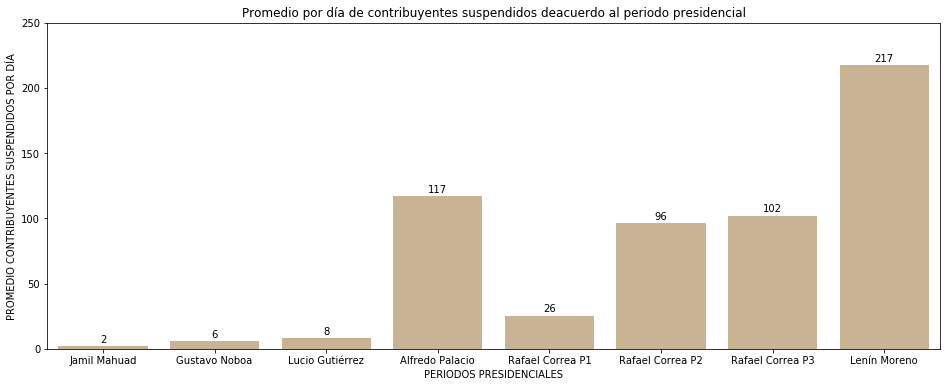

In [47]:
plt.figure(figsize=(16, 6))
dias_x_periodo = [780,1461,1322,969,635,826,1089,498]  # jm - lenin  --
ax = sns.countplot(x='PRESIDENTE', data=cdf2,color=COLOR)
ax.set(ylabel='PROMEDIO CONTRIBUYENTES SUSPENDIDOS POR DÍA', xlabel="PERIODOS PRESIDENCIALES",title='Promedio por día de contribuyentes suspendidos deacuerdo al periodo presidencial',ylim=(0, 250))
total = float(len(cdf))
for p in ax.patches:
    dias = dias_x_periodo.pop()
    p.set_height(p.get_height()/dias)
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center")

### Cantidad de establecimientos por tipo de actividad

In [48]:
df3 = guayaquil.dropna(subset=['ACTIVIDAD_ECONOMICA'])

In [49]:
len(df3['ACTIVIDAD_ECONOMICA'].unique())

1626

In [50]:
top10 = df3.groupby('ACTIVIDAD_ECONOMICA').size().to_frame('cantidad').sort_values(['cantidad'], ascending=False).reset_index()[:11]
top10['ACTIVIDAD_ECONOMICA_MIN'] = top10.apply(lambda row: row['ACTIVIDAD_ECONOMICA'][:25], axis=1)
top10['ACTIVIDAD_ECONOMICA'] = top10.apply(lambda row: row['ACTIVIDAD_ECONOMICA'][:55], axis=1)

0     RESTAURANTES, CEVICHERÍAS, PICANTERÍAS, CAFETE...
1     VENTA AL POR MENOR DE GRAN VARIEDAD DE PRODUCT...
2     INTERMEDIARIOS DEL COMERCIO DE COMBUSTIBLES, M...
3     ACTIVIDADES DE LIMPIABOTAS (BETUNEROS), PORTEA...
4     OTRAS ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y...
5     INTERMEDIACIÓN EN LA COMPRA, VENTA Y ALQUILER ...
6     VENTA AL POR MENOR DE GRAN VARIEDAD DE PRODUCT...
7     COMPRA - VENTA, ALQUILER Y EXPLOTACIÓN DE BIEN...
8     CONSTRUCCIÓN DE TODO TIPO DE EDIFICIOS RESIDEN...
9     VENTA AL POR MENOR DE PRENDAS DE VESTIR Y PELE...
10    SERVICIOS DE  ASESORAMIENTO, ORIENTACIÓN Y ASI...
Name: ACTIVIDAD_ECONOMICA, dtype: object

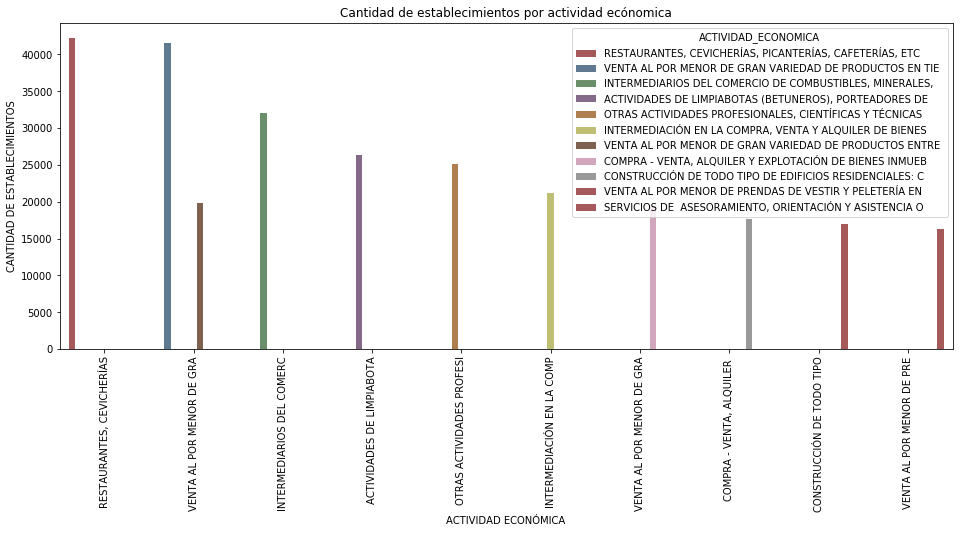

In [51]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(y='cantidad', x='ACTIVIDAD_ECONOMICA_MIN', data=top10,hue="ACTIVIDAD_ECONOMICA",palette=sns.color_palette("Set1", n_colors=10, desat=.5))
ax.set(ylabel='CANTIDAD DE ESTABLECIMIENTOS',xlabel="ACTIVIDAD ECONÓMICA", title='Cantidad de establecimientos por actividad ecónomica')
ax.set_xticklabels(labels=top10['ACTIVIDAD_ECONOMICA_MIN'],rotation=90)
top10["ACTIVIDAD_ECONOMICA"][:]

### Cantidad de contribuyentes por actividad

In [52]:
cont_act = df3[['ACTIVIDAD_ECONOMICA', 'NUMERO_RUC']].groupby(['ACTIVIDAD_ECONOMICA'])

In [53]:
top10_cont = cont_act['NUMERO_RUC'].nunique().to_frame('cantidad').sort_values('cantidad', ascending=False).reset_index()[:11]
top10_cont['ACTIVIDAD_ECONOMICA_MIN'] = top10_cont.apply(lambda row: row['ACTIVIDAD_ECONOMICA'][:25], axis=1)
top10_cont['ACTIVIDAD_ECONOMICA'] = top10_cont.apply(lambda row: row['ACTIVIDAD_ECONOMICA'][:50], axis=1)

In [54]:
top10_cont

,ACTIVIDAD_ECONOMICA,cantidad,ACTIVIDAD_ECONOMICA_MIN
0,VENTA AL POR MENOR DE GRAN VARIEDAD DE PRODUCT...,38936,VENTA AL POR MENOR DE GRA
1,"RESTAURANTES, CEVICHERÍAS, PICANTERÍAS, CAFETE...",37108,"RESTAURANTES, CEVICHERÍAS"
2,"INTERMEDIARIOS DEL COMERCIO DE COMBUSTIBLES, M...",30740,INTERMEDIARIOS DEL COMERC
3,"ACTIVIDADES DE LIMPIABOTAS (BETUNEROS), PORTEA...",25510,ACTIVIDADES DE LIMPIABOTA
4,"OTRAS ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y...",23584,OTRAS ACTIVIDADES PROFESI
5,"COMPRA - VENTA, ALQUILER Y EXPLOTACIÓN DE BIEN...",18859,"COMPRA - VENTA, ALQUILER"
6,"INTERMEDIACIÓN EN LA COMPRA, VENTA Y ALQUILER ...",18493,INTERMEDIACIÓN EN LA COMP
7,VENTA AL POR MENOR DE GRAN VARIEDAD DE PRODUCT...,18171,VENTA AL POR MENOR DE GRA
8,CONSTRUCCIÓN DE TODO TIPO DE EDIFICIOS RESIDEN...,17035,CONSTRUCCIÓN DE TODO TIPO
9,"SERVICIOS DE ASESORAMIENTO, ORIENTACIÓN Y ASI...",15531,SERVICIOS DE ASESORAMIEN


[Text(0, 0, 'VENTA AL POR MENOR DE GRAN VARIEDAD DE PRODUCTOS E'),
 Text(0, 0, 'RESTAURANTES, CEVICHERÍAS, PICANTERÍAS, CAFETERÍAS'),
 Text(0, 0, 'INTERMEDIARIOS DEL COMERCIO DE COMBUSTIBLES, MINER'),
 Text(0, 0, 'ACTIVIDADES DE LIMPIABOTAS (BETUNEROS), PORTEADORE'),
 Text(0, 0, 'OTRAS ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉC'),
 Text(0, 0, 'COMPRA - VENTA, ALQUILER Y EXPLOTACIÓN DE BIENES I'),
 Text(0, 0, 'INTERMEDIACIÓN EN LA COMPRA, VENTA Y ALQUILER DE B'),
 Text(0, 0, 'VENTA AL POR MENOR DE GRAN VARIEDAD DE PRODUCTOS E'),
 Text(0, 0, 'CONSTRUCCIÓN DE TODO TIPO DE EDIFICIOS RESIDENCIAL'),
 Text(0, 0, 'SERVICIOS DE  ASESORAMIENTO, ORIENTACIÓN Y ASISTEN')]

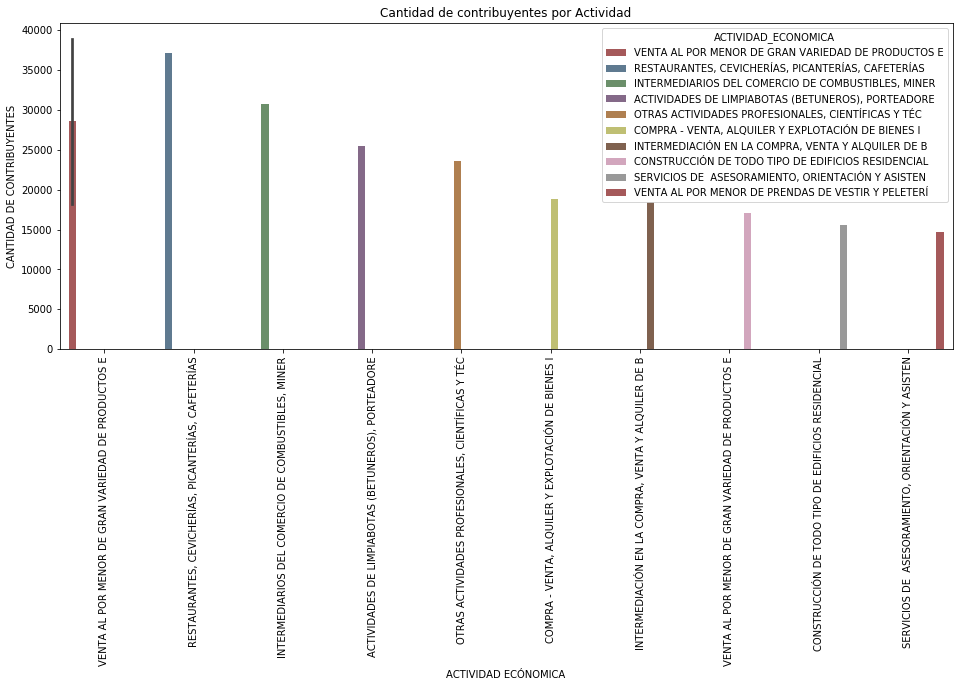

In [246]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(y='cantidad', x='ACTIVIDAD_ECONOMICA_MIN', data=top10_cont,hue="ACTIVIDAD_ECONOMICA",palette=sns.color_palette("Set1", n_colors=10, desat=.5))
ax.set(ylabel='CANTIDAD DE CONTRIBUYENTES', title='Cantidad de contribuyentes por Actividad',xlabel="ACTIVIDAD ECÓNOMICA")
ax.set_xticklabels(labels=top10_cont['ACTIVIDAD_ECONOMICA'],rotation=90)

In [55]:
df3 = df3.dropna(subset=['FECHA_INICIO_ACTIVIDADES'])
df3['FECHA_INICIO_ACTIVIDADES'] = pd.to_datetime(df3['FECHA_INICIO_ACTIVIDADES'])
df3['fecha_ano'] = df3['FECHA_INICIO_ACTIVIDADES'].dt.year
def mapper(month):
    return month.strftime('%b') 
df3['fecha_mes'] = df3['FECHA_INICIO_ACTIVIDADES'].apply(mapper)

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


0

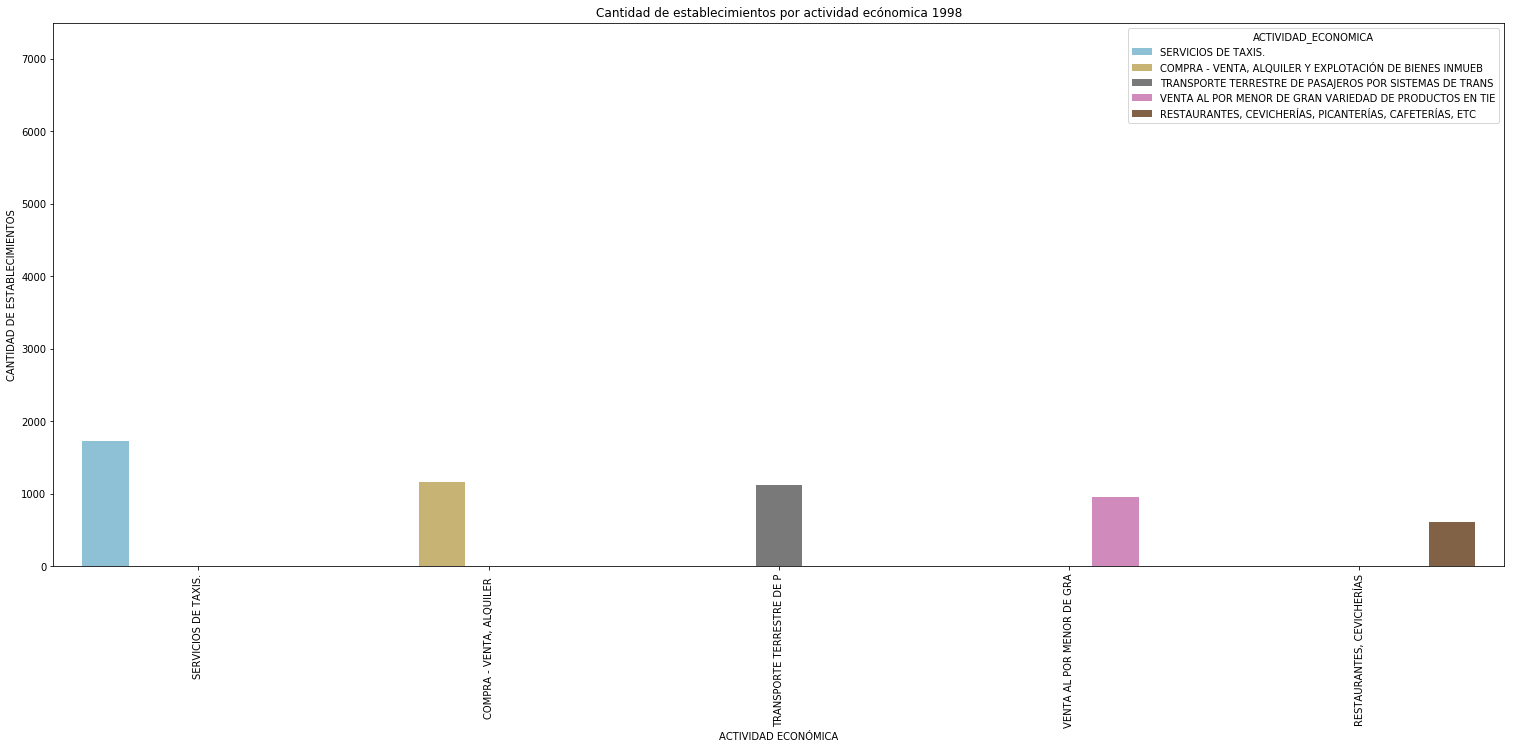

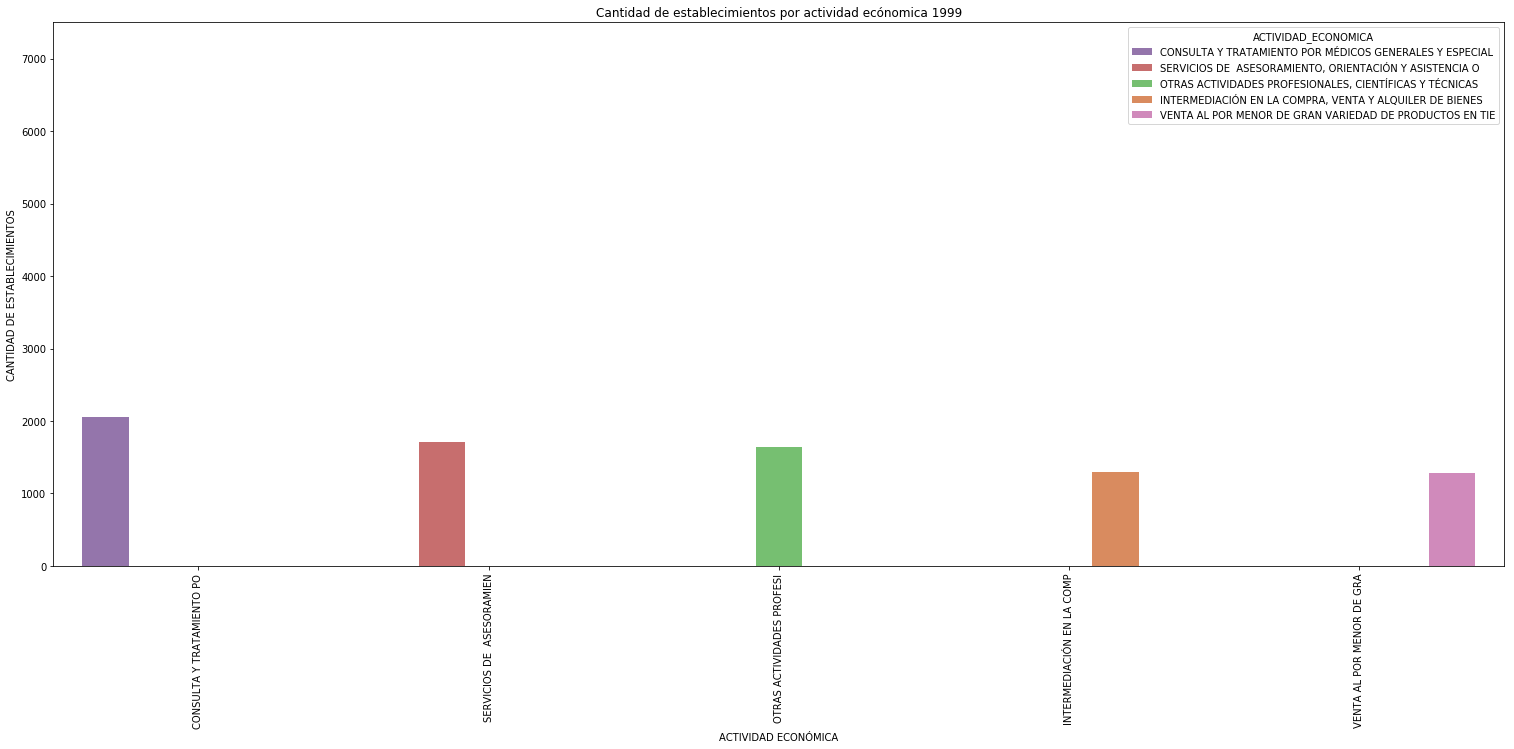

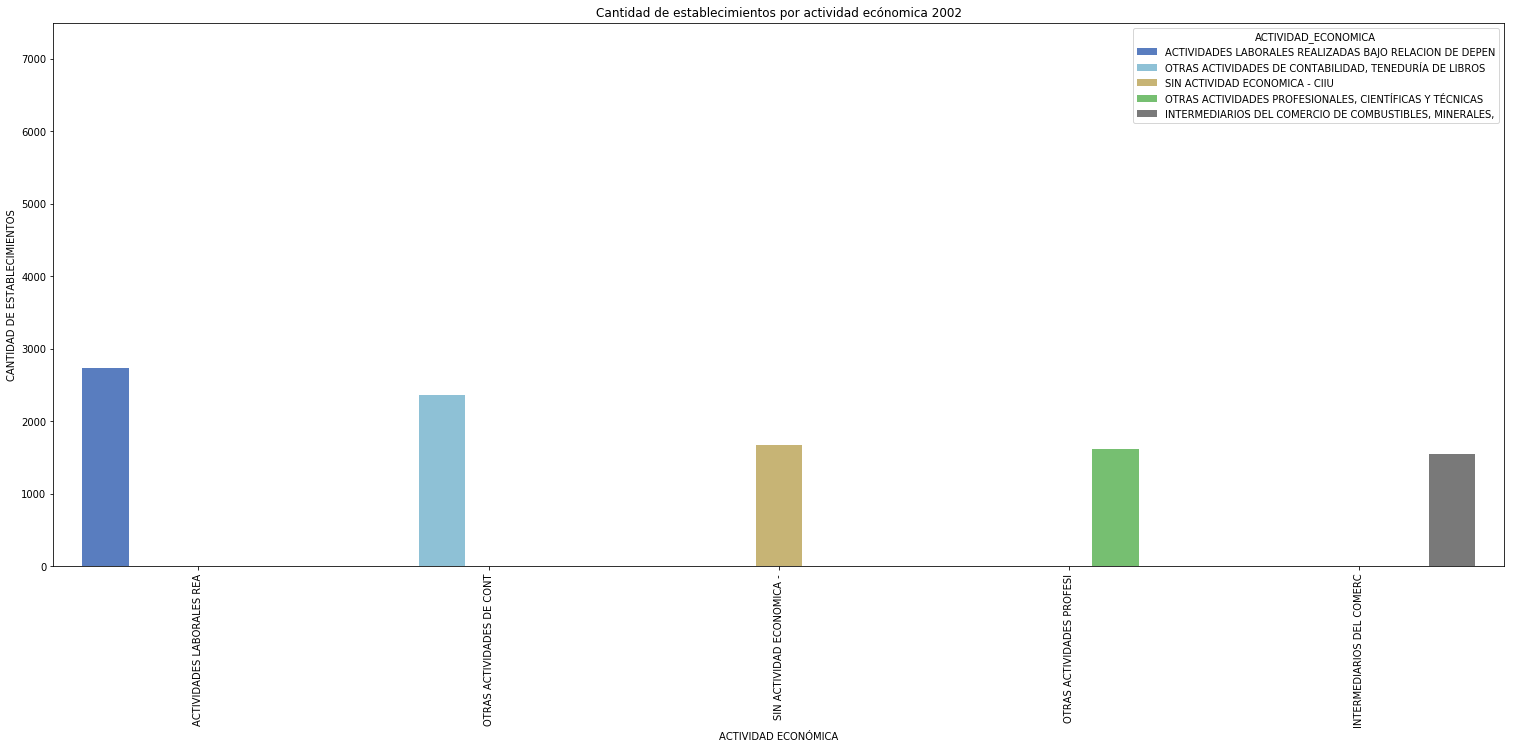

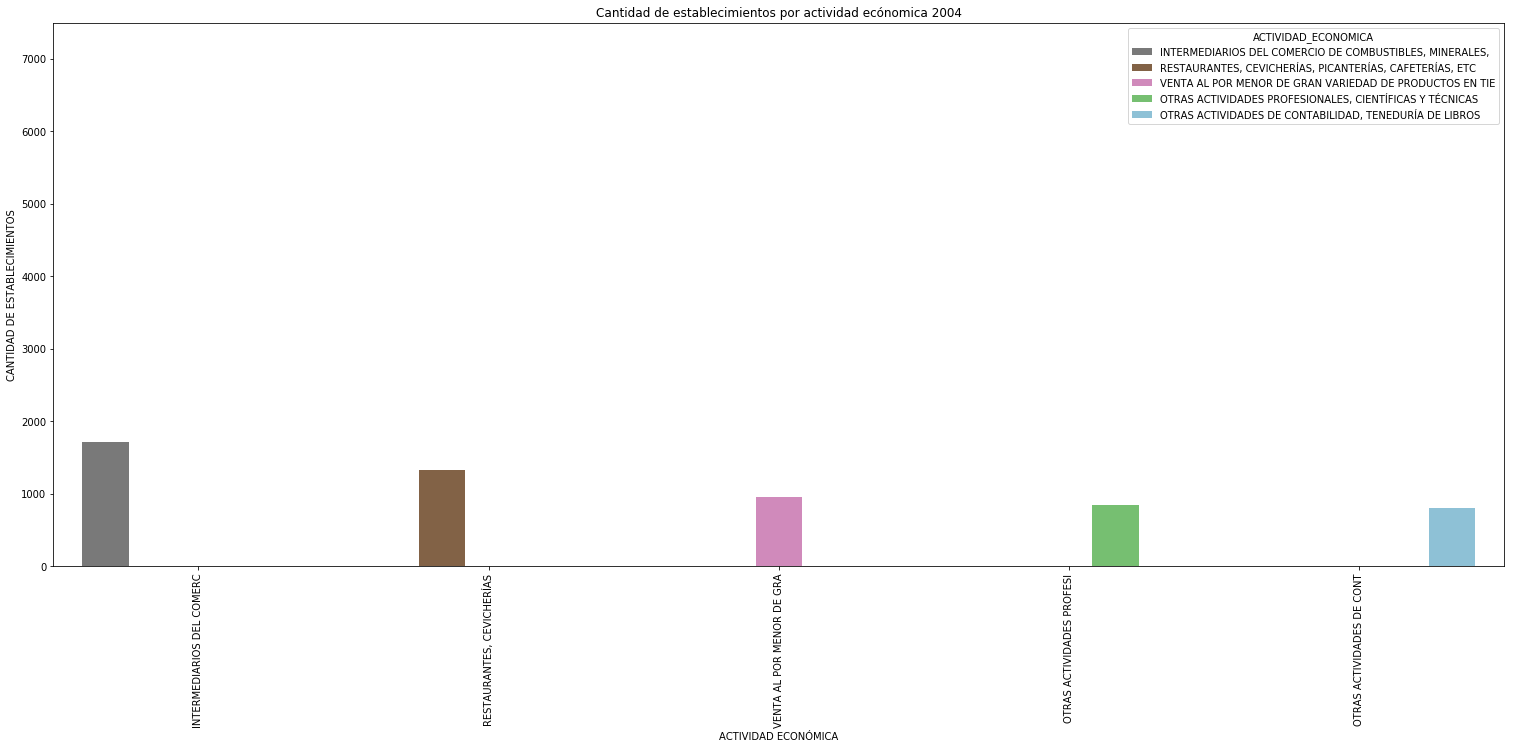

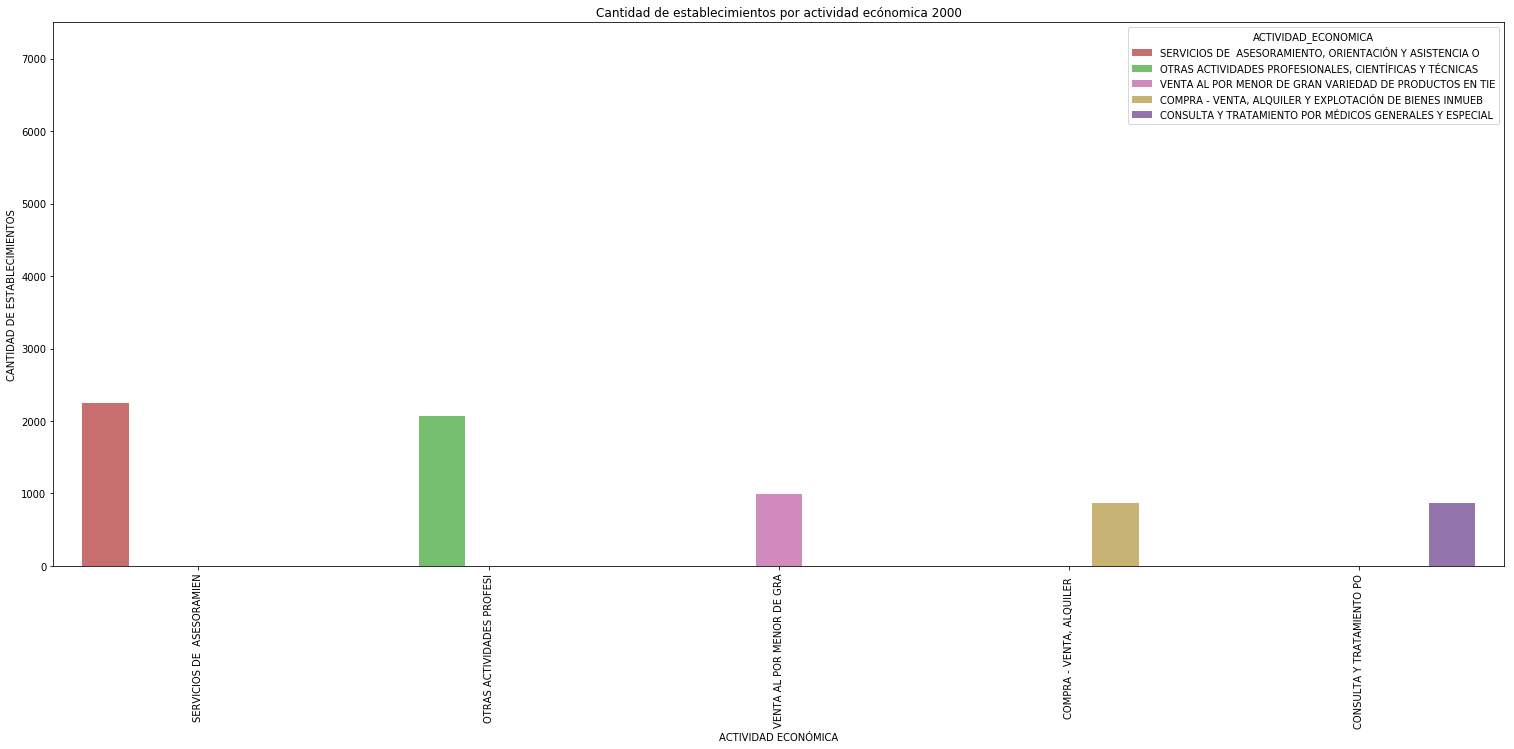

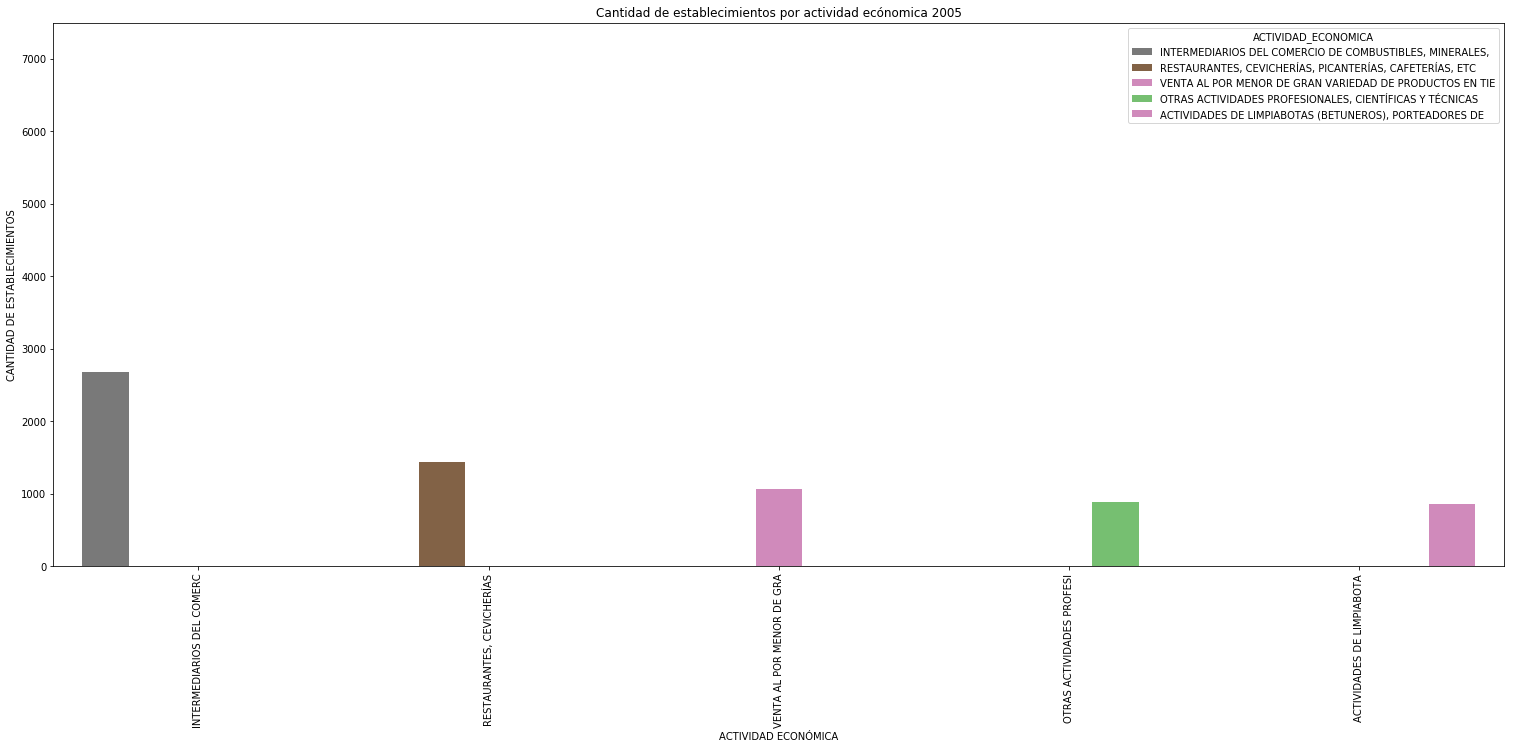

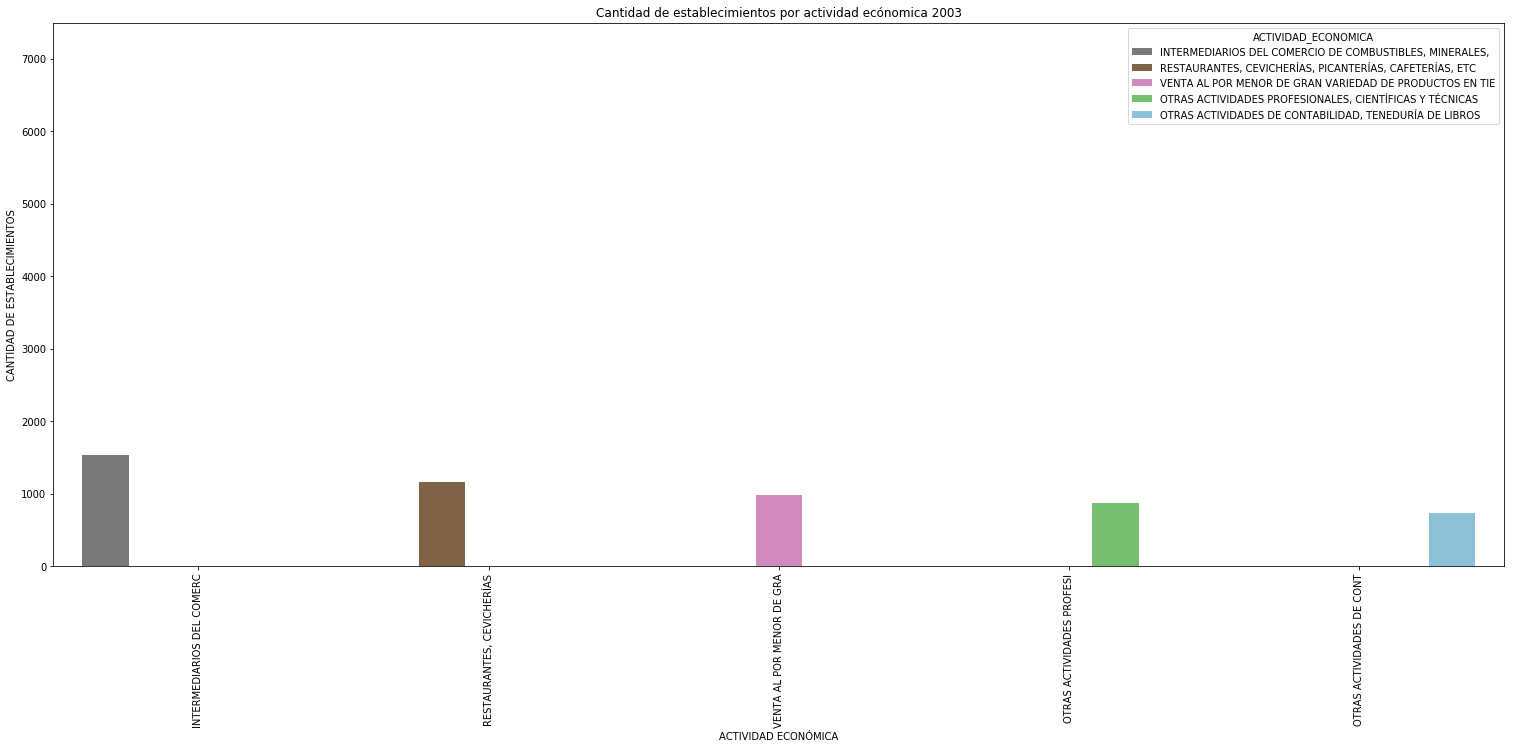

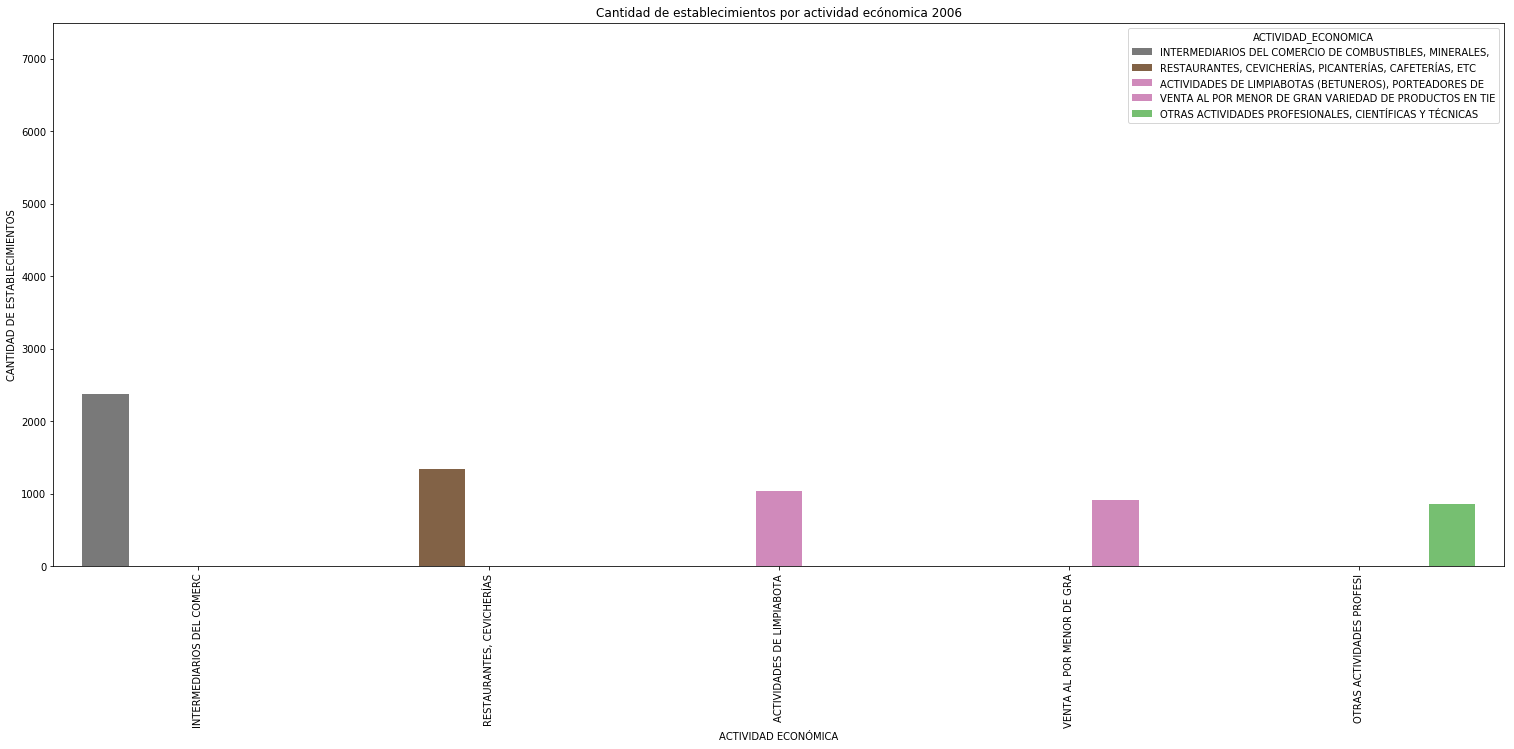

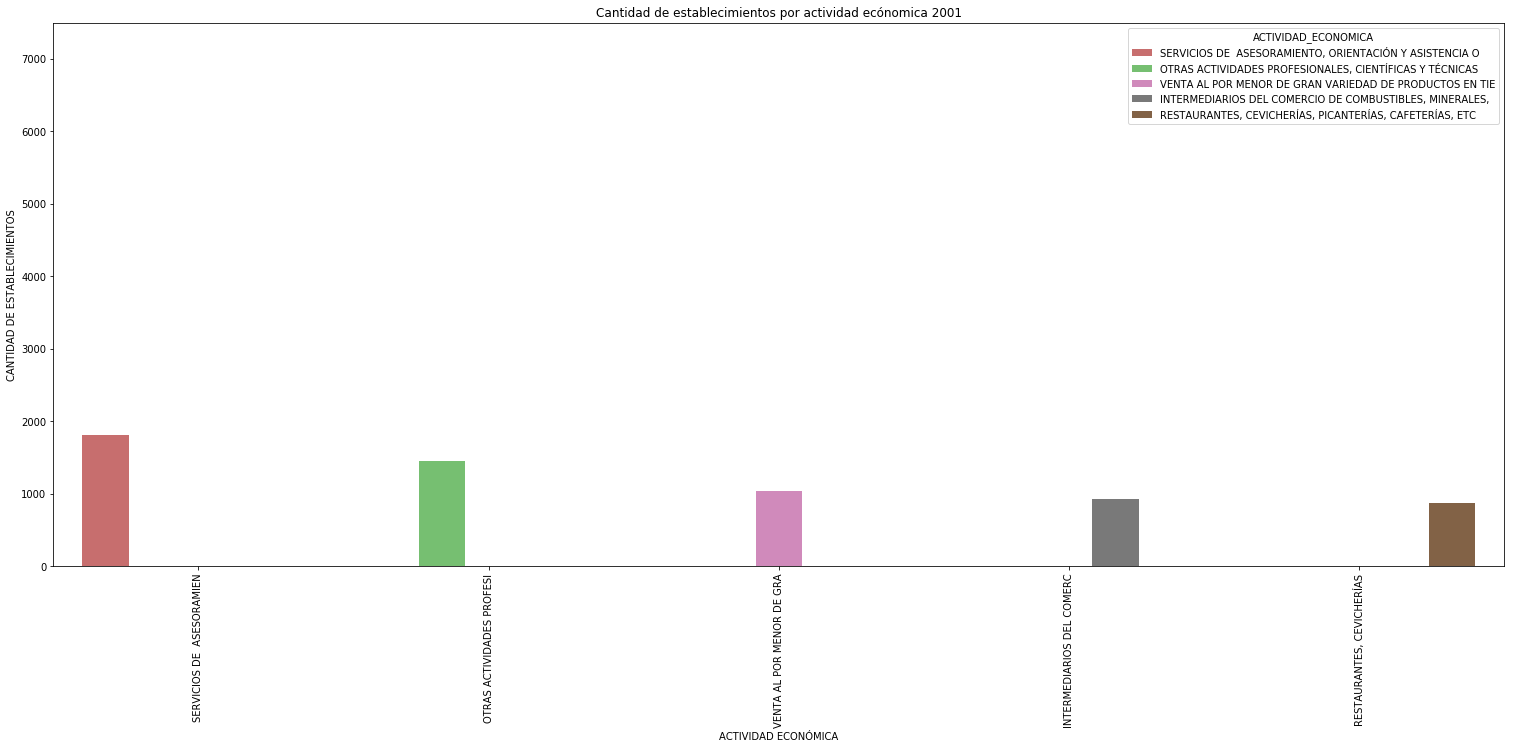

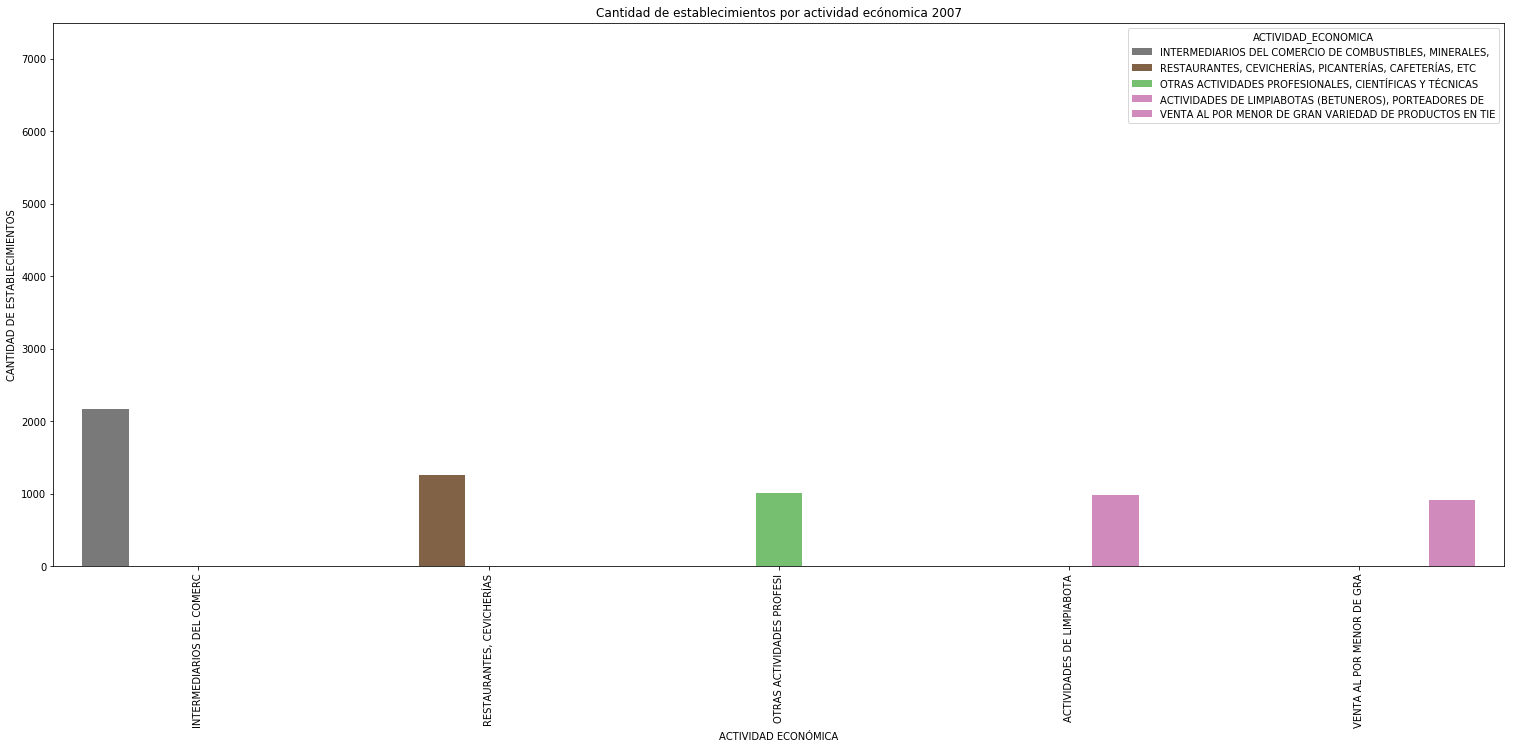

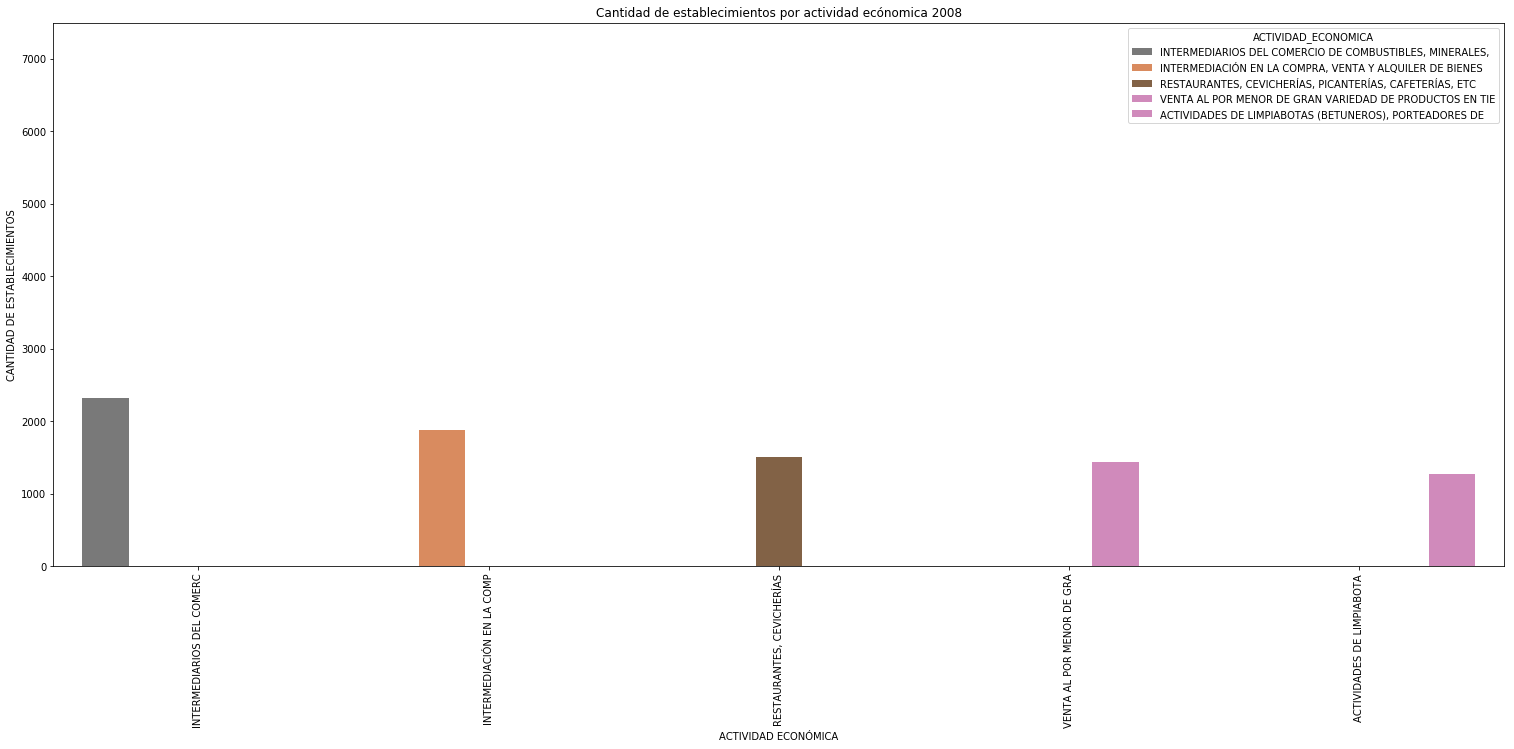

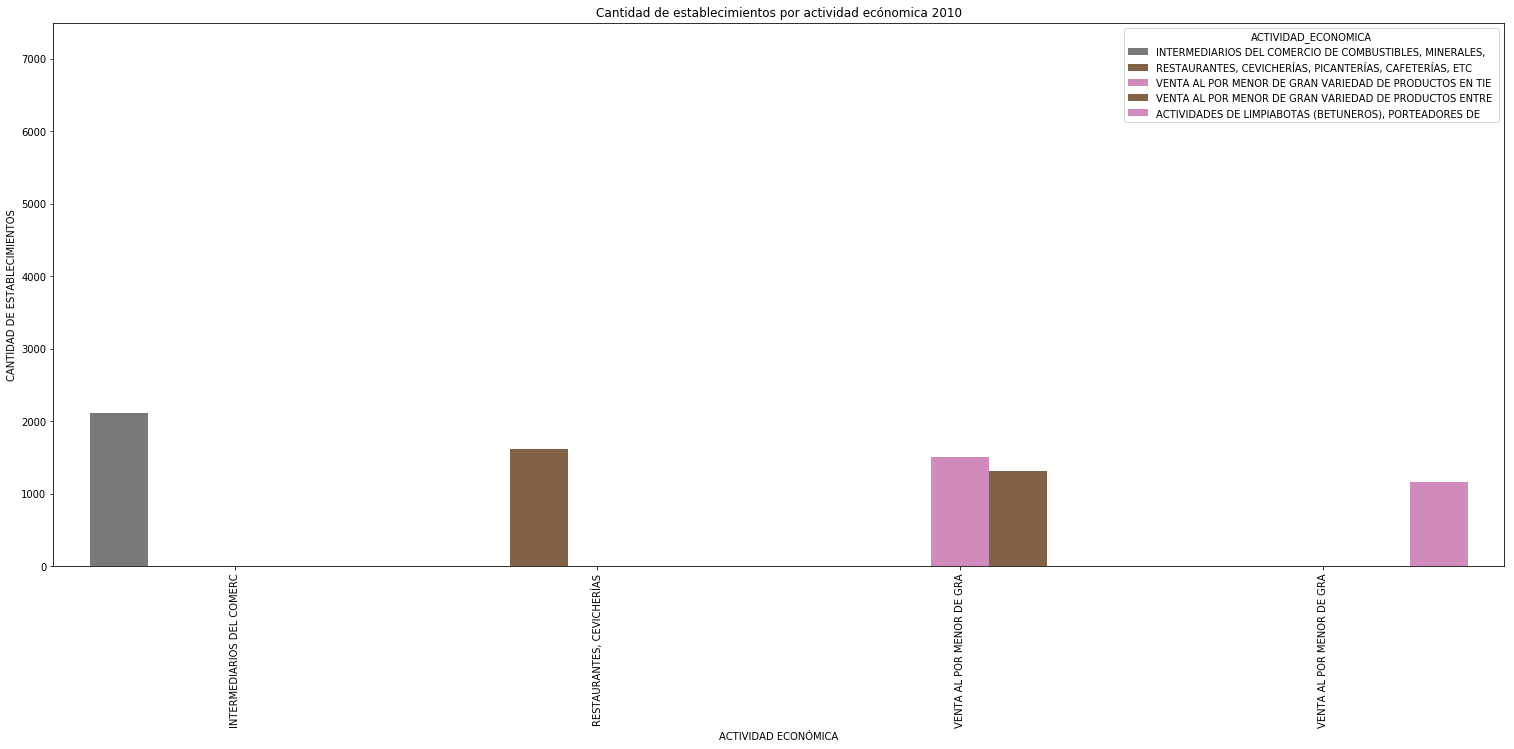

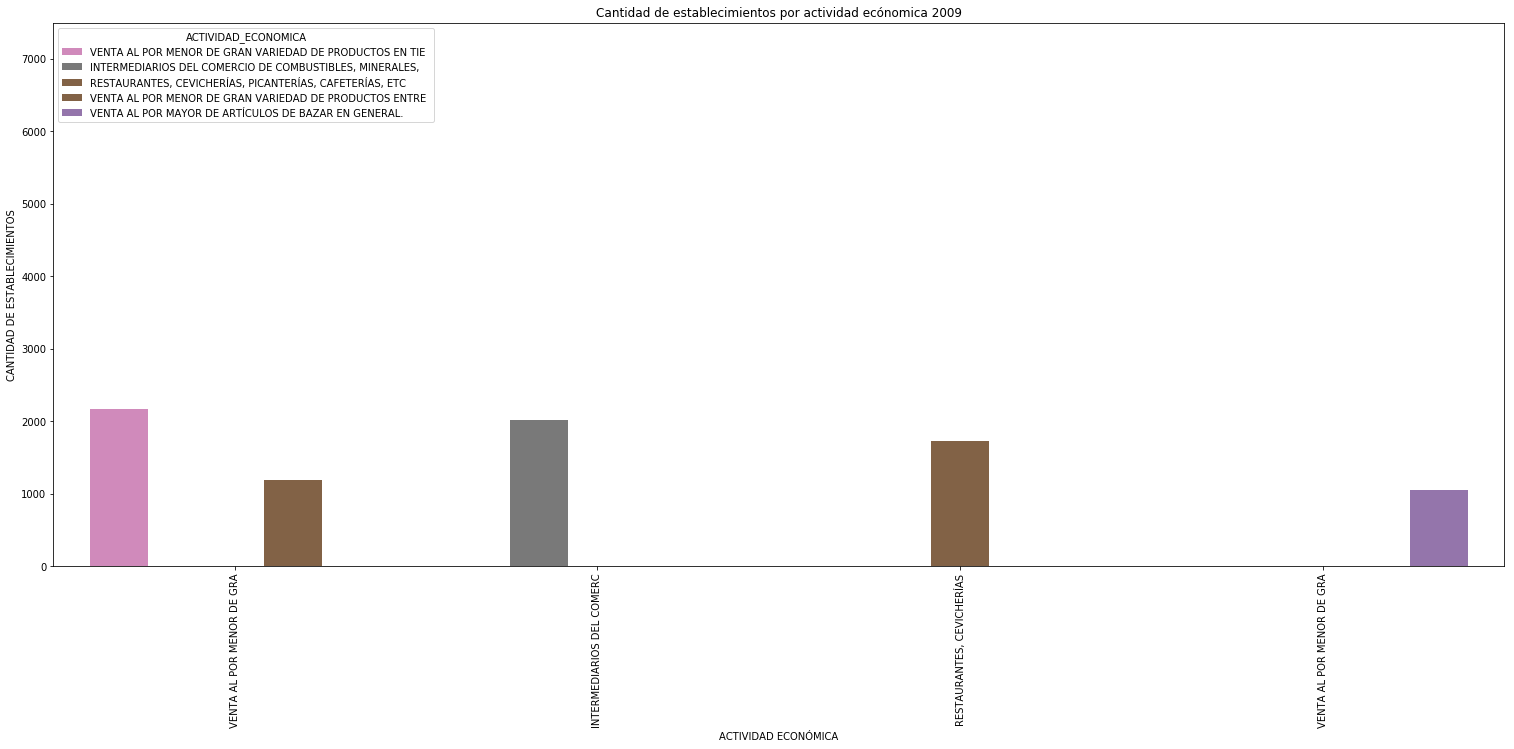

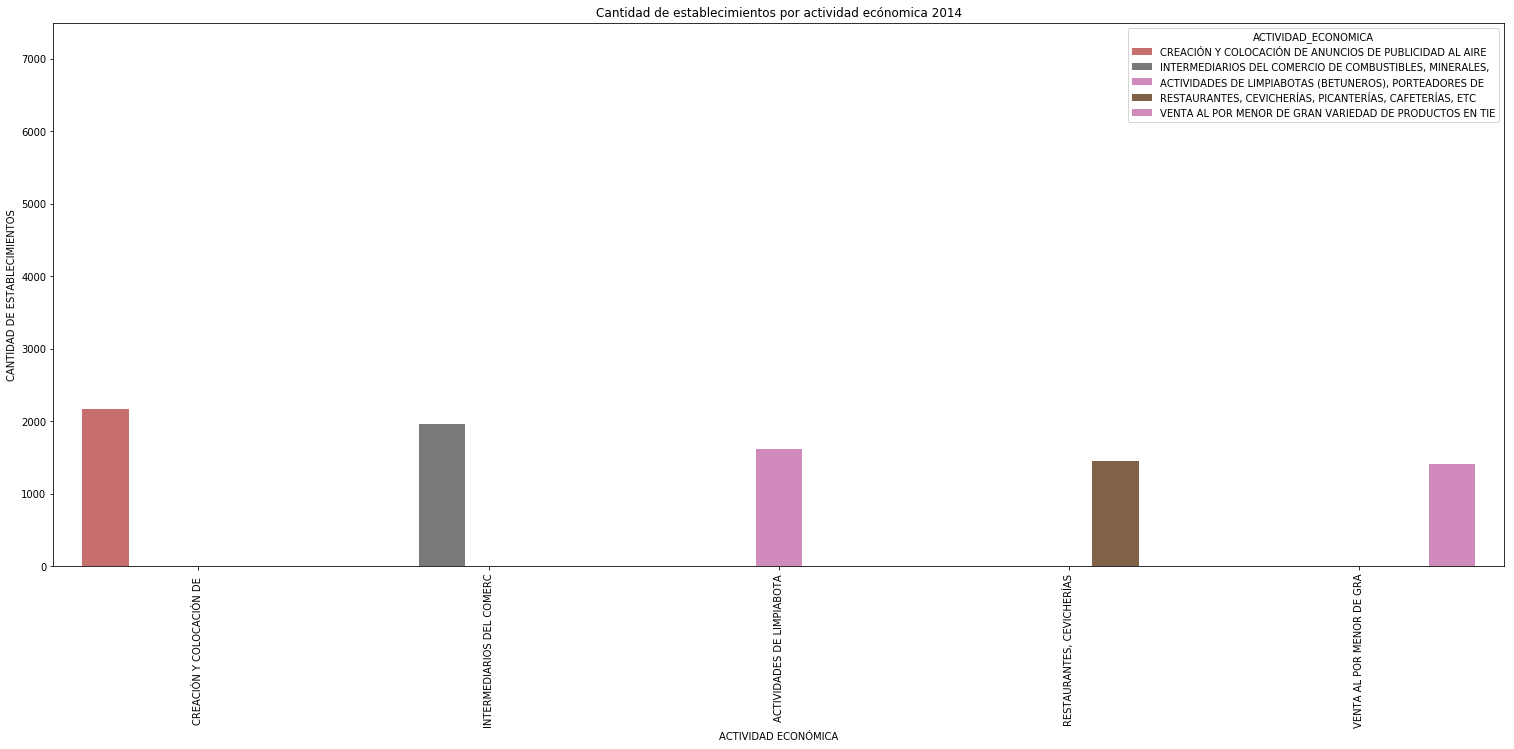

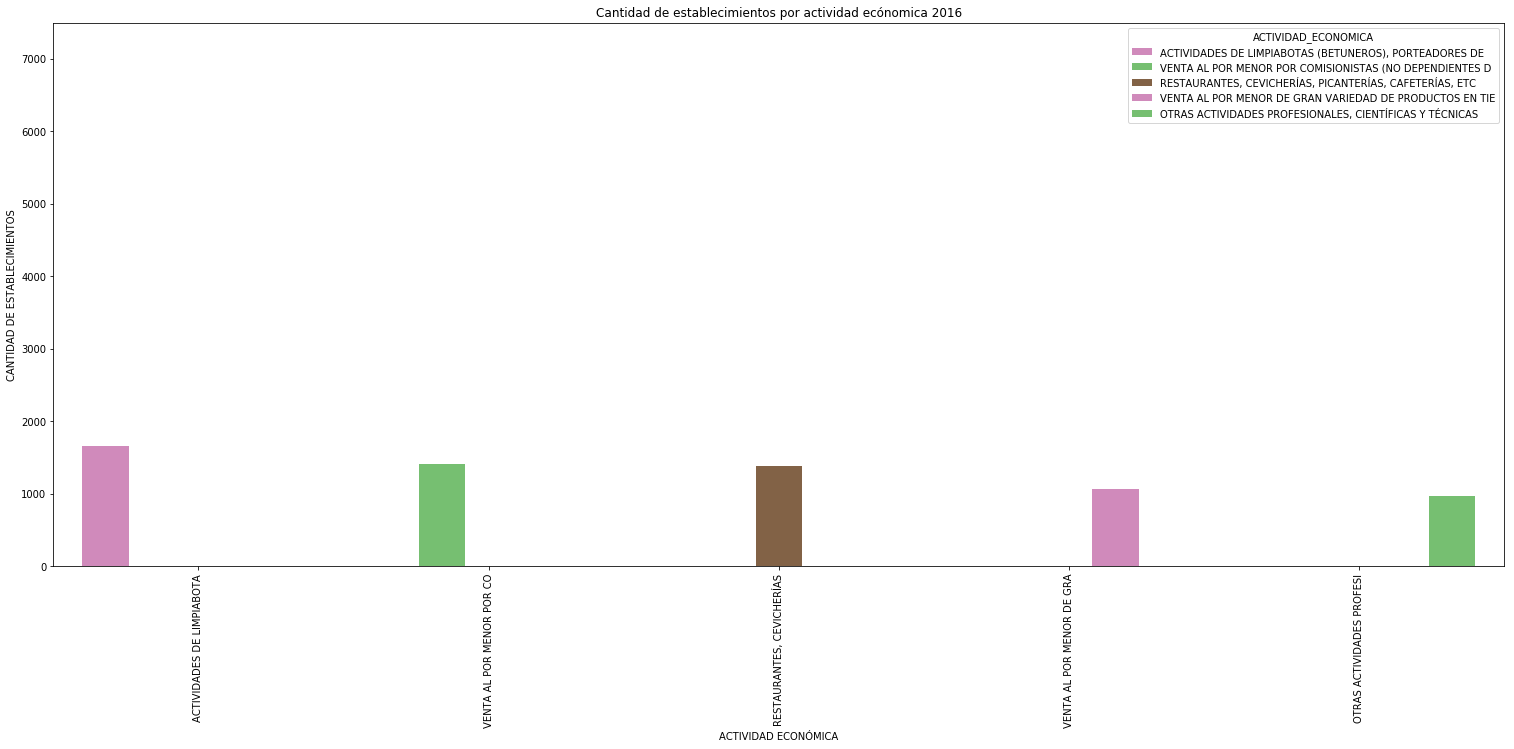

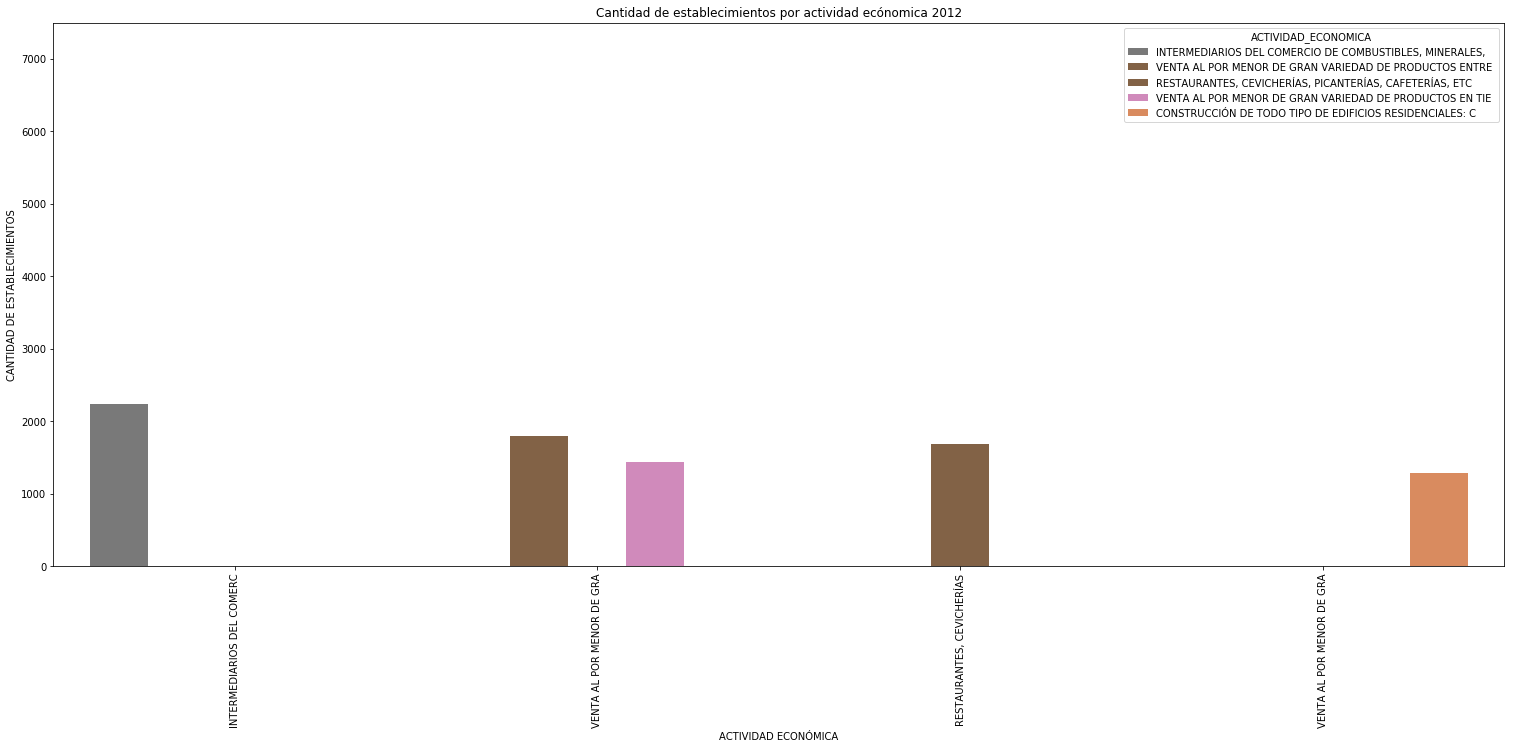

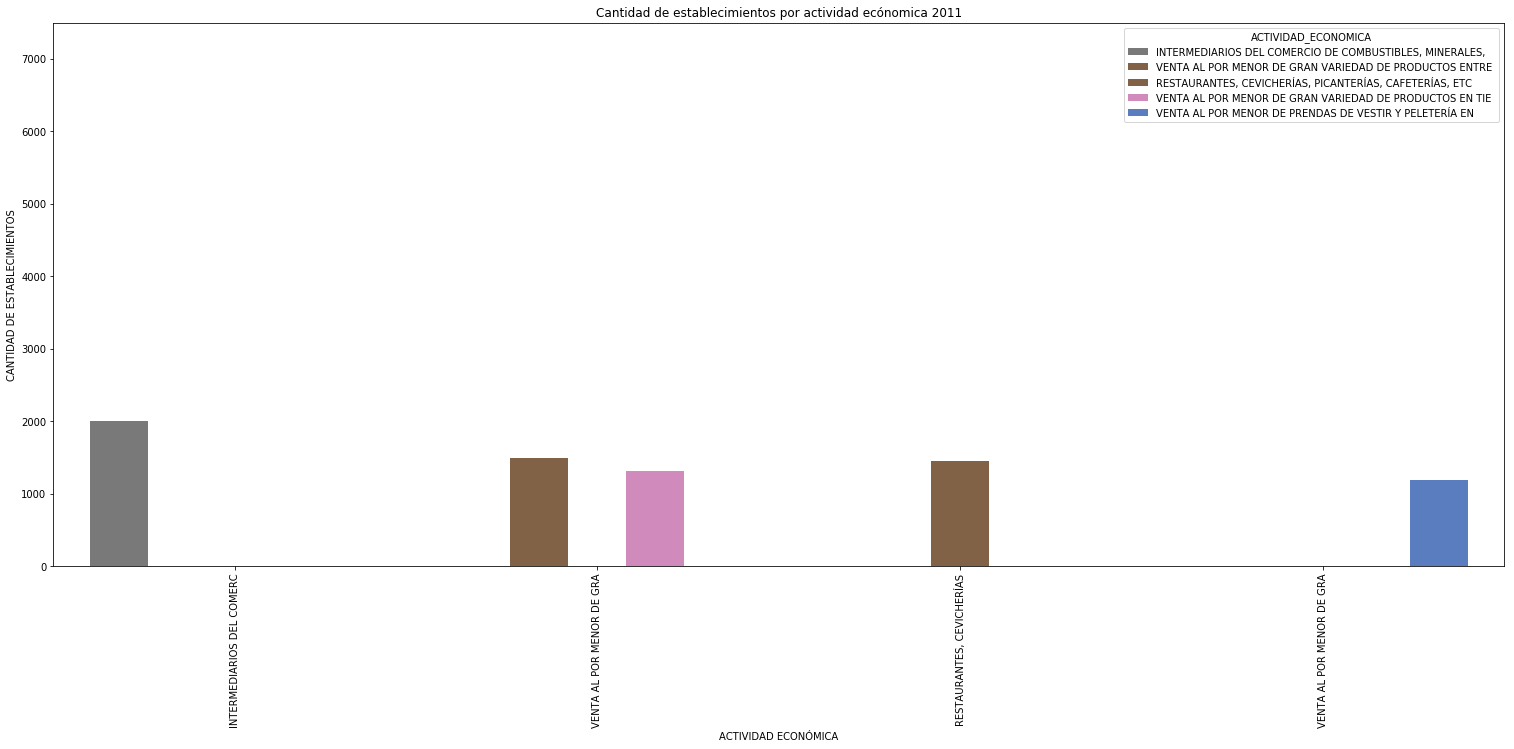

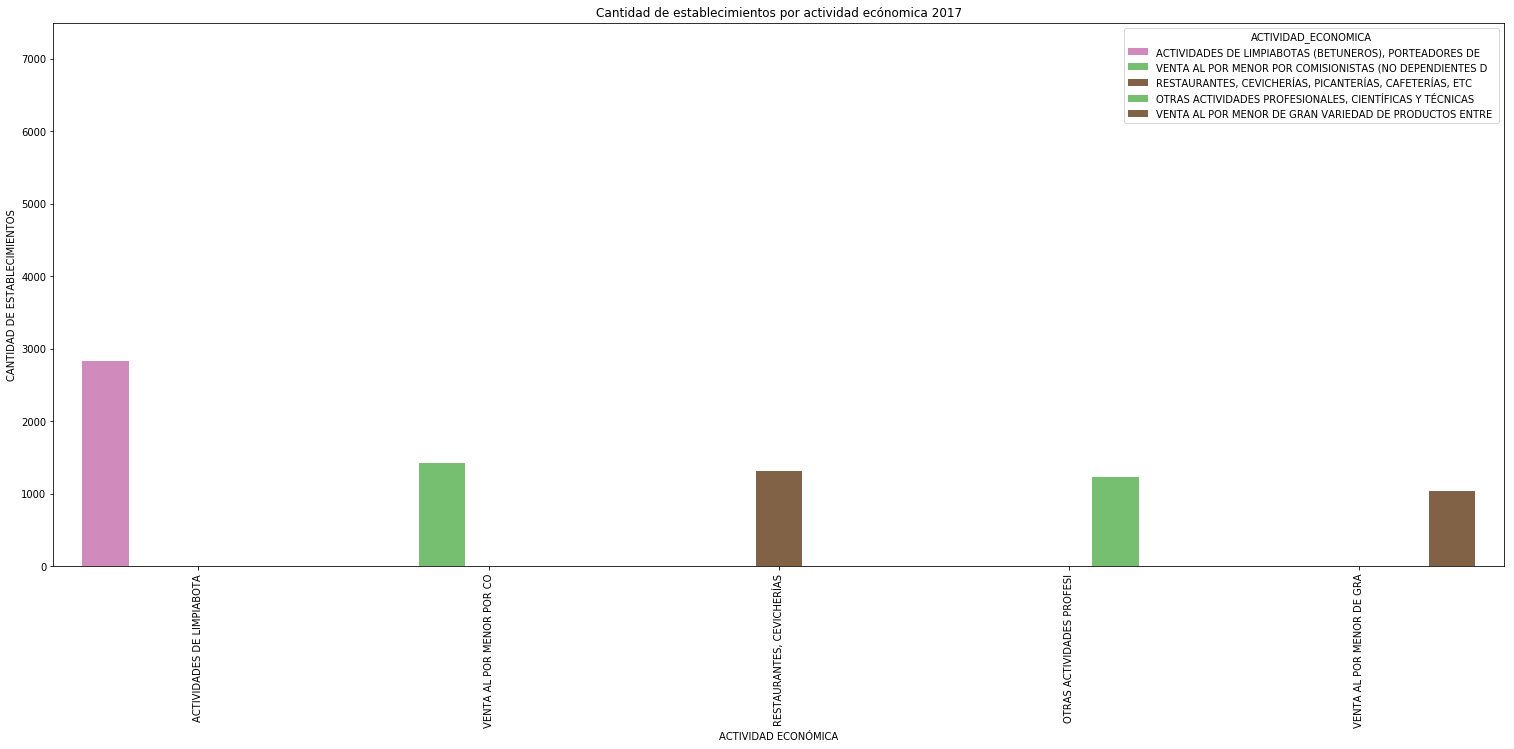

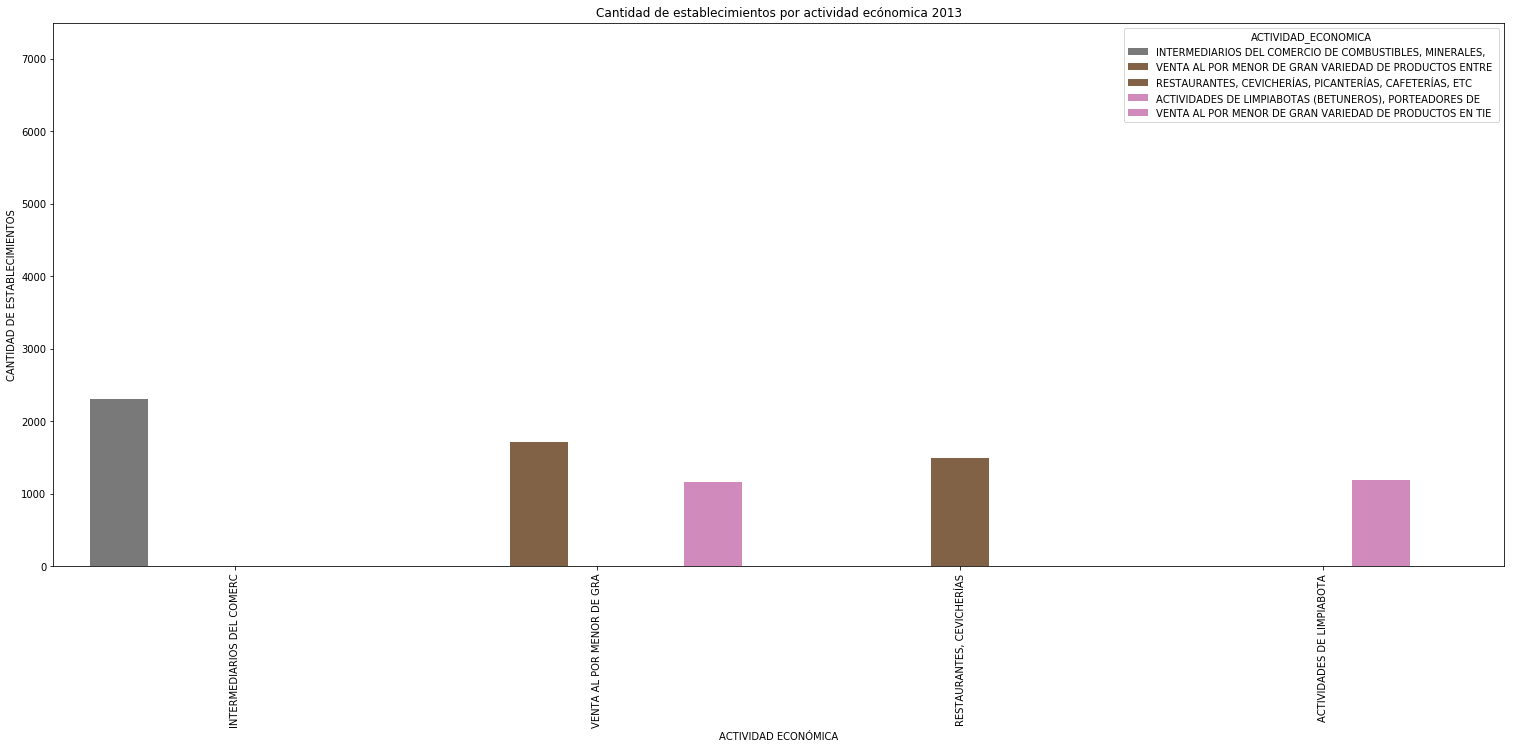

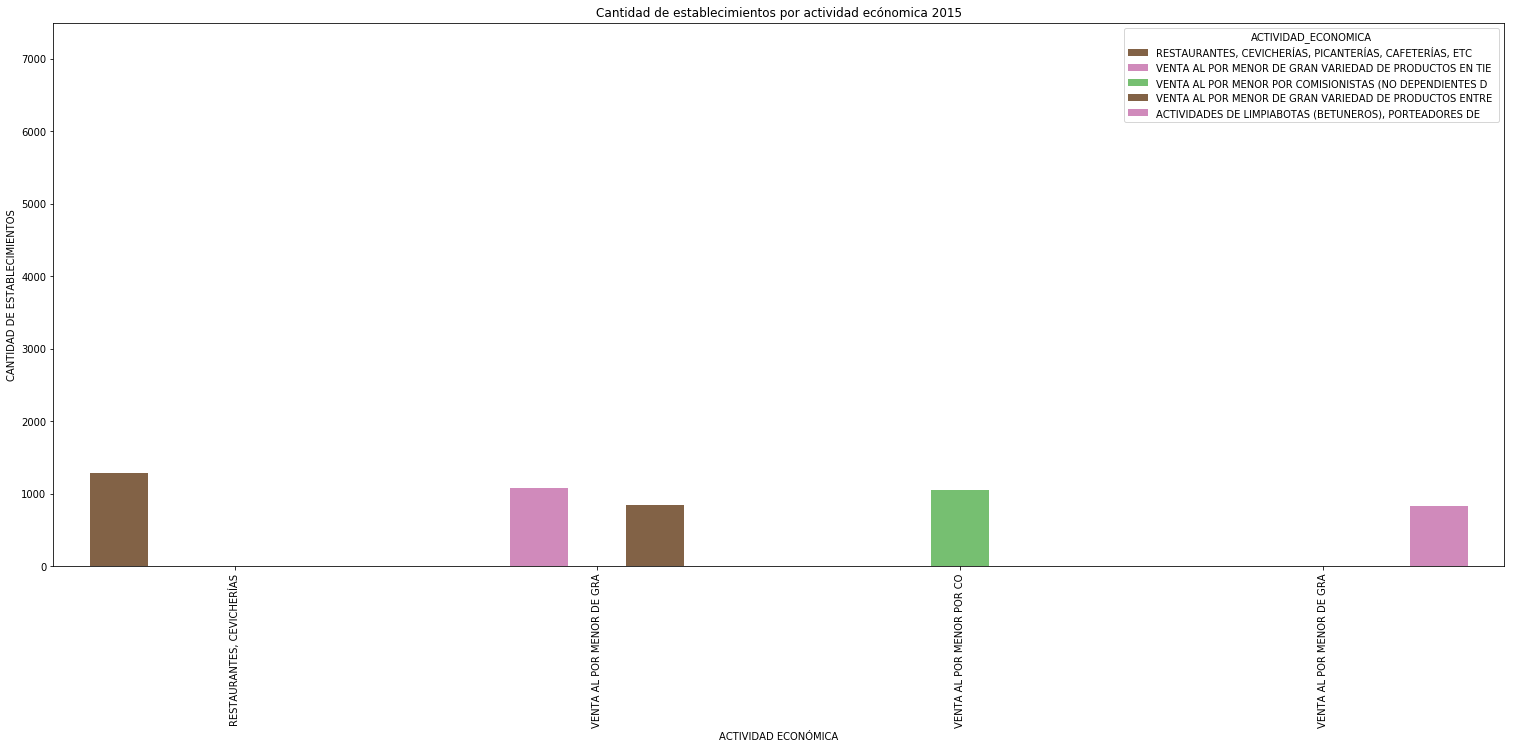

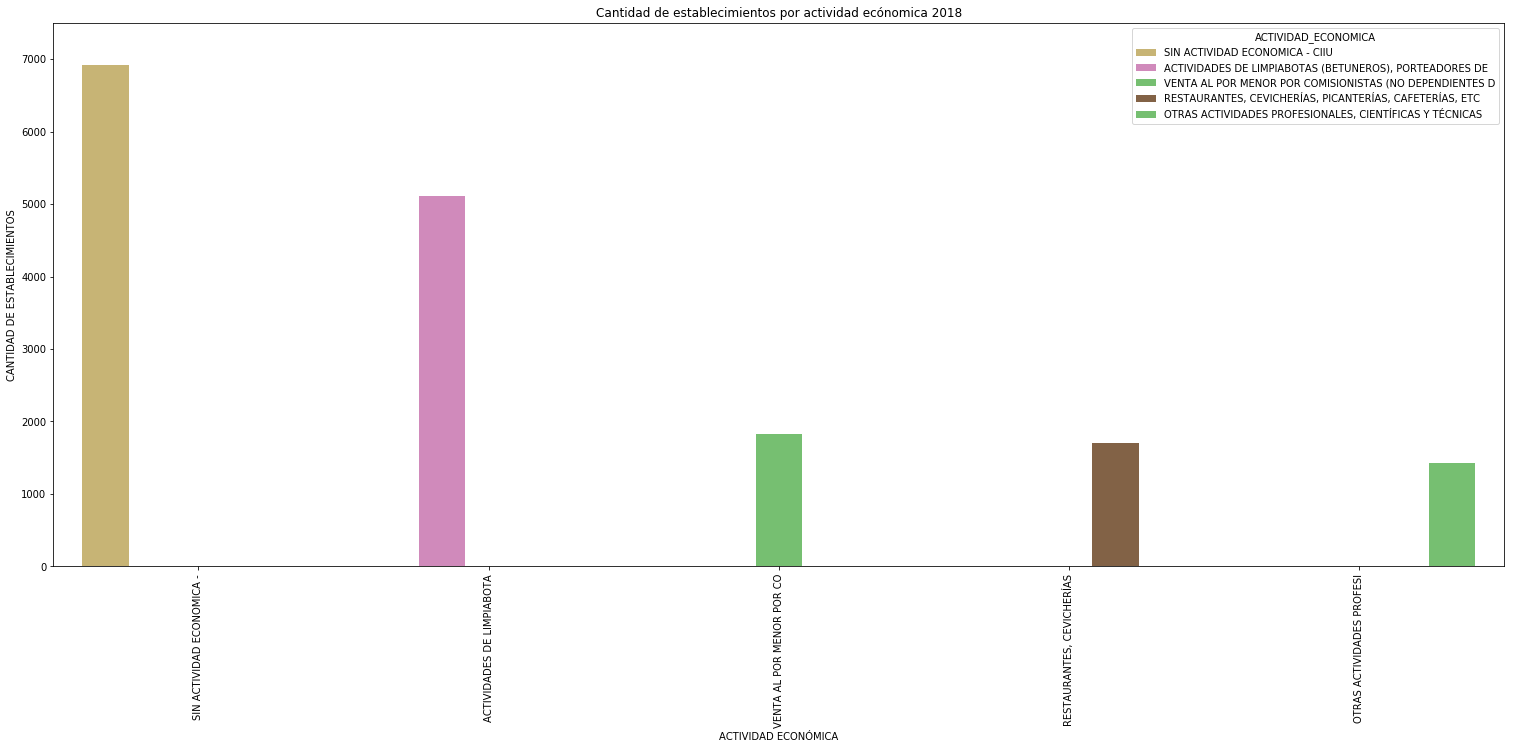

In [56]:
lista_colores = sns.color_palette("muted", n_colors=20, desat=1)
palette = dict(zip(top10['ACTIVIDAD_ECONOMICA'].head(1),"blue"))
dic = []
def por_actividad_mes(ano):
    plt.figure(figsize=(26, 10))
    df_x = df3[df3['fecha_ano']==ano ]
    top10 = df_x.groupby('ACTIVIDAD_ECONOMICA').size().to_frame('cantidad').sort_values(['cantidad'], ascending=False).reset_index()[:5]
    top10['ACTIVIDAD_ECONOMICA'] = top10.apply(lambda row: row['ACTIVIDAD_ECONOMICA'][:55], axis=1)
    top10['ACTIVIDAD_ECONOMICA_MIN'] = top10.apply(lambda row: row['ACTIVIDAD_ECONOMICA'][:25], axis=1)
    for actividad in top10['ACTIVIDAD_ECONOMICA']:
        if actividad not in dic:
            dic.append(actividad)
            palette.update({actividad:lista_colores.pop()})
    ax = sns.barplot(y='cantidad', x='ACTIVIDAD_ECONOMICA_MIN',ci=None, data=top10,hue="ACTIVIDAD_ECONOMICA",palette=palette)
    ax.set(ylabel='CANTIDAD DE ESTABLECIMIENTOS',xlabel="ACTIVIDAD ECONÓMICA", title='Cantidad de establecimientos por actividad ecónomica '+ str(ano),ylim=(0, 7500))
    ax.set_xticklabels(labels=top10['ACTIVIDAD_ECONOMICA_MIN'],rotation=90)
    plt.savefig("CONTRIBUYENTES_X_ANO_"+str(ano)+".png")
df3 = df3[ (1998 <=df3['fecha_ano']) & (df3['fecha_ano']<=2018)]
for ano in df3['fecha_ano'].unique().tolist():
    por_actividad_mes(ano)
#convert -delay 30 *.png establecimiento_actividad_ano.gif
len(lista_colores)